## Notes

Cells changed:
15:  tokens = [word for word in tokens if len(word) > 3] *perviously was 4, but I believe 3 is better as it includes “Joe”*

39: #top 10 words, least times used (rarest words that are large)
filtered_dict = {k: v for k, v in my_dict.items() if len(k) > 10}
sorted_dict = dict(sorted(filtered_dict.items(), key=lambda item: item[1], reverse=False))
print(sorted_dict)

*previously was if len(k) > 15*



59: def plot_doc2vec(doc2vec_df, titles,_perplexity=10):
    #visualize documents through applying TSNE to doc2vec matrix
    tsne_model = TSNE(perplexity=_perplexity, n_components=2, init='pca', n_iter=2500, random_state=23)
    doc2vec_df = tsne_model.fit_transform(doc2vec_df)
    x = []
    y = []
    for value in doc2vec_df:
        x.append(value[0])
        y.append(value[1])

    plt.figure(figsize=(8, 8)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        #plt.annotate(titles[i],
         #            xy=(x[i], y[i]),
          #           xytext=(1, 1),
           #          textcoords='offset points',
            #         ha='center',
             #        va='bottom', fontsize=3)
    plt.xlim(-250,250) #luke changed to (-400, 400) so the graphs weren't so tight
    plt.ylim(-250,250) #luke changed to (-400, 400) so the graphs weren't so tight
    plt.show()

**Changed xlim and ylim as these values worked better for me, Same goes for second&third  plot

Annotated Sections: 

→up to LDA, Vectorization → Models using BoW (stopped here).


In [2]:
import numpy as np
import os
import pandas as pd
import csv
import matplotlib.pyplot as plt
from transformers import pipeline
from pylab import rcParams
import seaborn as sns


import json
import glob

#Gensim
# vis
import pyLDAvis
import pyLDAvis.gensim_models


#spacy
import spacy
from nltk.corpus import stopwords

#vis
import pyLDAvis
import pyLDAvis.gensim

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

from textblob import TextBlob

import re,string
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize
import en_core_web_lg

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import MDS
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold
from sklearn import naive_bayes
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn import svm
from sklearn.manifold import TSNE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score


import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from gensim.models import Word2Vec,LdaMulticore, TfidfModel
from gensim.models.ldamodel import LdaModel
from gensim import corpora
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

import tensorflow as tf
from keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten
from tensorflow.keras.layers import Dense
from keras.layers import GlobalMaxPooling1D
from keras.layers import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer

In [3]:
#romzy's path
#path = "/Users/macbookpro/Desktop/MSDS_453"

#luke's path
path = "/Users/kraem/OneDrive/School/Data Science/Northwestern/Courses/MSDS-453-Natural-Language-Processing/Project/Corpus"

In [4]:
###############################################################################
### Processing text into lists
###############################################################################

#set working Directory to where class corpus is saved.
os.chdir(path)
#read in class corpus csv into python
data=pd.read_excel('Biden_Admin_By_Topic_Corpus 1.xlsx')

In [5]:
###############################################################################
### Processing text into lists
###############################################################################

#set working Directory to where class corpus is saved.
#os.chdir('/Users/kraem/OneDrive/School/Data Science/Northwestern/Courses/MSDS-453-Natural-Language-Processing/Project/Corpus')

#read in class corpus csv into python
#data=pd.read_excel('Biden_Admin_By_Topic_Corpus 1.xlsx')

In [6]:
data

,Doc_ID,DSI_Title,Text,Side,Category,Team Assessment,Prior_Team_Assessment
0,0,Left_CNN_Biden_Admin_Anger.docx,The US Department of Health and Human Services...,Left,Social Issues,Negative,Negative
1,1,LEFT The Biden Boom_ Economic Recovery in 2021...,The Biden Boom: Economic Recovery in 2021\n\n\...,Left,Economy,Positive,Positive
2,2,Right-FoxNews-BidenExecOrderAffordableCareAct-...,President Biden on Thursday signed a pair of e...,Right,Healthcare,Negative,Neutral
3,3,RIGHT Biden unveils $2 trillion plan to boost ...,Biden unveils $2 trillion plan to boost clean ...,Right,Environment,Negative,Negative
4,4,Left-CNN-BidenToutsEducation-Neutral.docx,Biden touts education funding in infrastructur...,Left,Education,Negative,Neutral
5,5,Right_BidenKillingAlQuedaLeader_NYPost_Angry.docx,Republicans say the killing of al Qaeda kingpi...,Right,National Security,Negative,Negative
6,6,Left_Republicans_Sharpen_Attacks_NYTIMES_Anger...,Since the Supreme Court overturned Roe v. Wade...,Left,Social Issues,Negative,Negative
7,7,LEFT Midterms with Ten Million New Jobs.docx,Biden Heads for the Midterms with Ten Million ...,Left,Economy,Positive,Positive
8,8,Right-NewYorkPost-The Iron Hand of Government-...,The iron hand of gov’t is the biggest reason N...,Right,Economy,Negative,Negative
9,9,LEFT Companies Flock to Bidenâ€™s Climate Tax ...,Companies Flock to Bidenâ€™s Climate Tax Break...,Left,Economy,Positive,Positive


# EDA

## Melissa: If more visualizations are needed, let's work on that as a team.

Boxplot of word counts by article topics

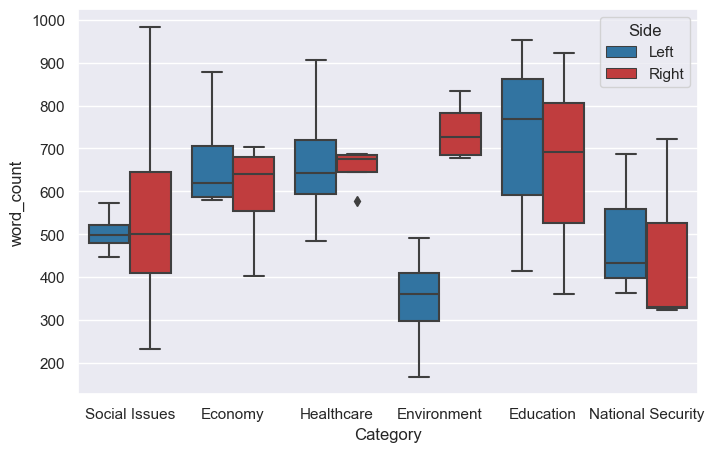

In [7]:
#EDA

#word count
data['word_count'] = data['Text'].str.count(' ') + 1

palette = ['tab:blue', 'tab:red']

sns.set(rc={'figure.figsize':(8,5)})
sns.boxplot(data=data, x='Category', y='word_count', hue='Side', palette=palette)
plt.savefig("EDA_BoxPlot.png")

## Melissa: We made everything binary (positive and negative) which made model creation a lot easier.  The multi-class classification was difficult and none of the class code melded with it which is why we moved to just positive and negative reviews.

In [8]:
data["Team Assessment"].value_counts()

Team Assessment
Negative    31
Positive    13
Name: count, dtype: int64

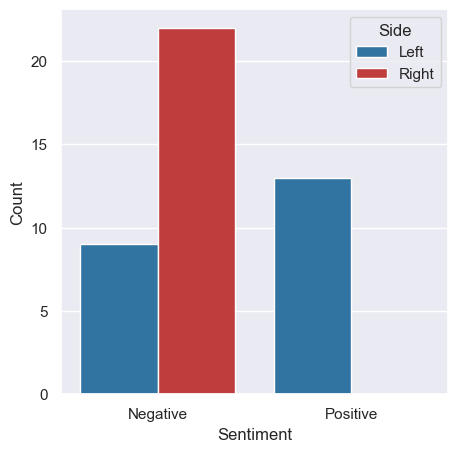

In [9]:
sns.set(rc={'figure.figsize':(5,5)})
sns.countplot(data=data, x=data['Team Assessment'], hue='Side', palette=palette)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.savefig("EDA_CountPlot.png")

^Right articles are only talking abot the Biden Admin in a Negative way. While Left articles are mostly talking in a positive way 

In [10]:
###############################################################################
### Function to process documents, from class code
###############################################################################
def clean_doc(doc): 
    #split document into individual words
    tokens=doc.split()
    re_punc = re.compile('[%s]' % re.escape(string.punctuation))
    # remove punctuation from each word
    tokens = [re_punc.sub('', w) for w in tokens]
    # remove remaining tokens that are not alphabetic
    tokens = [word for word in tokens if word.isalpha()]
    # filter out short tokens
    tokens = [word for word in tokens if len(word) > 3]
    #lowercase all words
    tokens = [word.lower() for word in tokens]
    # filter out stop words
    stop_words = set(stopwords.words('english'))
    tokens = [w for w in tokens if not w in stop_words]         
    return tokens

^created tokens by cleaning doc by removing punctioation, splitting documents into individual words, removing tokens with words less than 3 characters, removed stopwords in english dictionary, removed all non alphabetic characters. Chose len(word) > 3 to include Joe.


In [11]:
# lemmatization function
def lemmatization(texts, allowed_postags=["NOUN", "ADJ", "VERB", "ADV"]):
    """using lemmatization to get root words"""
    nlp = spacy.load("en_core_web_lg", disable=["parser", "ner"]) # disable to make spacy run faster because these 2 are computationally expensive
    texts_out = []
    for text in texts:
        doc = nlp(text)
        new_text = []
        for token in doc:
            if token.pos_ in allowed_postags:
                new_text.append(token.lemma_)
        final = " ".join(new_text)
        texts_out.append(final)
    return (texts_out)

^lemmetization to get text root words only. These will be composed of the root nouns, adjectives, verbs, and adverbs. 

In [12]:
#create empty list to store text documents titles
titles=[]

#for loop which appends the DSI title to the titles list
for i in range(0,len(data)):
    temp_text=data['DSI_Title'].iloc[i]
    titles.append(temp_text)

#create empty list to store text documents
text_body=[]

#for loop which appends the text to the text_body list
for i in range(0,len(data)):
    temp_text=data['Text'].iloc[i]
    text_body.append(temp_text)

#Note: the text_body is the unprocessed list of documents read directly form the xlsx.
    
#empty list to store processed documents
processed_text=[]

#for loop to process the text to the processed_text list
for i in text_body:
    text=clean_doc(i)
    processed_text.append(text)

#Note: the processed_text is the PROCESSED list of documents read directly form 
#the xlsx.  Note the list of words is separated by commas.


#stitch back together individual words to reform body of text
final_processed_text=[]

for i in processed_text:
    temp_DSI=i[0]
    for k in range(1,len(i)):
        temp_DSI=temp_DSI+' '+i[k]
    final_processed_text.append(temp_DSI)

In [13]:
final_processed_text_clean = lemmatization(final_processed_text)

In [14]:
#data[""] = 
processed = pd.DataFrame(final_processed_text_clean)
processed = processed.rename(columns={processed.columns[0]: 'Processed_Text'})

df2 = pd.concat([data, processed], axis=1)
df2

,Doc_ID,DSI_Title,Text,Side,Category,Team Assessment,Prior_Team_Assessment,word_count,Processed_Text
0,0,Left_CNN_Biden_Admin_Anger.docx,The US Department of Health and Human Services...,Left,Social Issues,Negative,Negative,572,service propose rule protect privacy seek abor...
1,1,LEFT The Biden Boom_ Economic Recovery in 2021...,The Biden Boom: Economic Recovery in 2021\n\n\...,Left,Economy,Positive,Positive,649,economic recovery take office year bad economy...
2,2,Right-FoxNews-BidenExecOrderAffordableCareAct-...,President Biden on Thursday signed a pair of e...,Right,Healthcare,Negative,Neutral,578,sign pair executive order expand access afford...
3,3,RIGHT Biden unveils $2 trillion plan to boost ...,Biden unveils $2 trillion plan to boost clean ...,Right,Environment,Negative,Negative,688,unveil plan boost clean energy rebuild infrast...
4,4,Left-CNN-BidenToutsEducation-Neutral.docx,Biden touts education funding in infrastructur...,Left,Education,Negative,Neutral,769,tout education fund infrastructure proposal vi...
5,5,Right_BidenKillingAlQuedaLeader_NYPost_Angry.docx,Republicans say the killing of al Qaeda kingpi...,Right,National Security,Negative,Negative,324,kill raise question disastrous withdrawal give...
6,6,Left_Republicans_Sharpen_Attacks_NYTIMES_Anger...,Since the Supreme Court overturned Roe v. Wade...,Left,Social Issues,Negative,Negative,490,overturn call roll right grow bold elect offic...
7,7,LEFT Midterms with Ten Million New Jobs.docx,Biden Heads for the Midterms with Ten Million ...,Left,Economy,Positive,Positive,579,head midterm job voter make strong case americ...
8,8,Right-NewYorkPost-The Iron Hand of Government-...,The iron hand of gov’t is the biggest reason N...,Right,Economy,Negative,Negative,703,iron hand big reason economy recover covid ign...
9,9,LEFT Companies Flock to Bidenâ€™s Climate Tax ...,Companies Flock to Bidenâ€™s Climate Tax Break...,Left,Economy,Positive,Positive,591,company flock climate break drive cost boost c...


In [15]:
#show our final data set with all necessary columns
final_data = df2.copy()
final_data

,Doc_ID,DSI_Title,Text,Side,Category,Team Assessment,Prior_Team_Assessment,word_count,Processed_Text
0,0,Left_CNN_Biden_Admin_Anger.docx,The US Department of Health and Human Services...,Left,Social Issues,Negative,Negative,572,service propose rule protect privacy seek abor...
1,1,LEFT The Biden Boom_ Economic Recovery in 2021...,The Biden Boom: Economic Recovery in 2021\n\n\...,Left,Economy,Positive,Positive,649,economic recovery take office year bad economy...
2,2,Right-FoxNews-BidenExecOrderAffordableCareAct-...,President Biden on Thursday signed a pair of e...,Right,Healthcare,Negative,Neutral,578,sign pair executive order expand access afford...
3,3,RIGHT Biden unveils $2 trillion plan to boost ...,Biden unveils $2 trillion plan to boost clean ...,Right,Environment,Negative,Negative,688,unveil plan boost clean energy rebuild infrast...
4,4,Left-CNN-BidenToutsEducation-Neutral.docx,Biden touts education funding in infrastructur...,Left,Education,Negative,Neutral,769,tout education fund infrastructure proposal vi...
5,5,Right_BidenKillingAlQuedaLeader_NYPost_Angry.docx,Republicans say the killing of al Qaeda kingpi...,Right,National Security,Negative,Negative,324,kill raise question disastrous withdrawal give...
6,6,Left_Republicans_Sharpen_Attacks_NYTIMES_Anger...,Since the Supreme Court overturned Roe v. Wade...,Left,Social Issues,Negative,Negative,490,overturn call roll right grow bold elect offic...
7,7,LEFT Midterms with Ten Million New Jobs.docx,Biden Heads for the Midterms with Ten Million ...,Left,Economy,Positive,Positive,579,head midterm job voter make strong case americ...
8,8,Right-NewYorkPost-The Iron Hand of Government-...,The iron hand of gov’t is the biggest reason N...,Right,Economy,Negative,Negative,703,iron hand big reason economy recover covid ign...
9,9,LEFT Companies Flock to Bidenâ€™s Climate Tax ...,Companies Flock to Bidenâ€™s Climate Tax Break...,Left,Economy,Positive,Positive,591,company flock climate break drive cost boost c...


## Topic Modeling (LDA)

### the code below is taking the "processed text" and deriving the bi and tri grams from the processed text, and converting those bi and trigrams to dictionary format and getting the frequency of each term then creating a corpus with a key value pair, then running that corpus through the LDA models to get terms and topics that fall into the same category. 

In [26]:
%%time

data_words = final_data["Processed_Text"]

words = [doc.split(" ") for doc in data_words]

# create bigrams and trigrams
bigram_phrases = gensim.models.Phrases(data_words, min_count=8, threshold=20) # higher threshold means fewer phrases, can adjust based on results
trigram_phrases = gensim.models.Phrases(bigram_phrases[data_words], threshold=20) # higher threshold means fewer phrases, can adjust based on results

bigram = gensim.models.phrases.Phraser(bigram_phrases)
trigram = gensim.models.phrases.Phraser(trigram_phrases)

# function to make bigrams and trigrams
def make_bigrams(texts):
    return ([bigram[doc] for doc in texts])

def make_trigrams(texts):
    return ([trigram[bigram[doc]] for doc in texts])

data_bigrams = make_bigrams(data_words)
data_bigrams_trigrams = make_trigrams(data_bigrams)


CPU times: total: 359 ms
Wall time: 477 ms


In [27]:
%%time
# create dictionary
id2word = corpora.Dictionary(words)
texts = words
corpus = [id2word.doc2bow(text) for text in texts]


CPU times: total: 15.6 ms
Wall time: 19.1 ms


In [28]:
# human readable corpus, id-frequency
print([[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]])

[[('abortion', 7), ('access', 3), ('accord', 1), ('action', 1), ('administration', 11), ('administrative', 1), ('ally', 1), ('already', 1), ('also', 1), ('appeal', 2), ('approval', 1), ('arguably', 1), ('articulate', 1), ('ask', 1), ('availability', 1), ('begin', 1), ('brace', 1), ('call', 2), ('certain', 1), ('chaotic', 1), ('circuit', 1), ('circumstance', 1), ('civil', 1), ('close', 1), ('come', 1), ('commitment', 2), ('contentious', 1), ('convene', 1), ('country', 2), ('court', 1), ('cover', 1), ('create', 1), ('criminal', 1), ('current', 1), ('decision', 3), ('department', 1), ('disclosure', 2), ('discussion', 1), ('dobbs', 2), ('door', 1), ('drop', 1), ('drug', 2), ('education', 1), ('effect', 2), ('effort', 1), ('end', 1), ('engage', 1), ('entity', 1), ('exist', 1), ('federal', 1), ('fight', 1), ('find', 1), ('flashpoint', 1), ('follow', 1), ('food', 1), ('fresh', 1), ('frustrate', 1), ('frustrated', 1), ('guidance', 5), ('health', 2), ('highlight', 1), ('hold', 1), ('host', 1), 

In [29]:
print (corpus[0])

[(0, 7), (1, 3), (2, 1), (3, 1), (4, 11), (5, 1), (6, 1), (7, 1), (8, 1), (9, 2), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 2), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 2), (26, 1), (27, 1), (28, 2), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 3), (35, 1), (36, 2), (37, 1), (38, 2), (39, 1), (40, 1), (41, 2), (42, 1), (43, 2), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 5), (59, 2), (60, 1), (61, 1), (62, 1), (63, 2), (64, 1), (65, 1), (66, 3), (67, 1), (68, 1), (69, 3), (70, 1), (71, 3), (72, 1), (73, 1), (74, 3), (75, 1), (76, 1), (77, 1), (78, 1), (79, 2), (80, 1), (81, 1), (82, 1), (83, 1), (84, 7), (85, 1), (86, 1), (87, 1), (88, 2), (89, 1), (90, 2), (91, 1), (92, 1), (93, 4), (94, 1), (95, 2), (96, 2), (97, 2), (98, 2), (99, 3), (100, 1), (101, 7), (102, 1), (103, 1), (104, 3), (105, 1), (106, 1), (107, 1), (108, 2), (109, 1), (110, 1)

In [38]:
%%time
# build topic model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                            id2word=id2word,
                                            num_topics=6,
                                            random_state=100,
                                            update_every=1,
                                            chunksize=100,
                                            passes=20,
                                            alpha=0.01,
                                            per_word_topics=True)


CPU times: total: 953 ms
Wall time: 1.32 s


In [39]:
# print topics from model
print(lda_model.print_topics(num_words=5))


[(0, '0.014*"plan" + 0.012*"borrower" + 0.009*"repayment" + 0.007*"energy" + 0.007*"amount"'), (1, '0.010*"say" + 0.008*"border" + 0.008*"child" + 0.008*"health" + 0.007*"include"'), (2, '0.007*"government" + 0.006*"order" + 0.006*"country" + 0.005*"federal" + 0.005*"american"'), (3, '0.016*"climate" + 0.009*"say" + 0.008*"plan" + 0.008*"policy" + 0.007*"year"'), (4, '0.010*"school" + 0.010*"state" + 0.009*"plan" + 0.008*"say" + 0.006*"care"'), (5, '0.021*"drug" + 0.011*"generic" + 0.007*"state" + 0.006*"cost" + 0.006*"problem"')]


In [36]:
from gensim.models import CoherenceModel

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=words, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Coherence Score: ', coherence_lda)

Coherence Score:  0.31681879598996227


In [42]:
# visualize topic model
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word, mds="mmds")
pyLDAvis.display(vis)

#pyLDAvis.save_html(vis, 'LDA.html')

C:\Users\kraem\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


## LDA Model

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 

In [43]:
#LDA model

X = bow_data
y = final_data["Team Assessment"]
y = y.apply(lambda x: 1 if x == 'Positive' else 0)

#split data into train/test
#split dataset into a training and testing data set(s)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [44]:
#Fit the LDA model
model = LinearDiscriminantAnalysis()
model.fit(X, y)

LinearDiscriminantAnalysis()

In [57]:
#LDA accuracy
predicted = model.predict(X_test)
accuracy_LDA = metrics.accuracy_score(predicted, y_test)
print(str('{:04.2f}'.format(accuracy_LDA*100))+'%')

78.57%


In [58]:
#classification report
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86        10
           1       0.67      0.50      0.57         4

    accuracy                           0.79        14
   macro avg       0.74      0.70      0.71        14
weighted avg       0.77      0.79      0.78        14



# Vectorization Methods

## These methods are used to vectorize are data which we'll then use for each of our models

## Bag of Words (BoW) - All Data

BoW is a simple vectorization technique that converts text into finite length vector. 

In [43]:
#Bag of Words (BoW)

# Tokenization
tokenizer = Tokenizer()
tokenizer.fit_on_texts(final_data['Processed_Text'])
sequences = tokenizer.texts_to_sequences(final_data['Processed_Text'])

# Vocabulary size
vocab_size = len(tokenizer.word_index) + 1

# Padding
max_len = max([len(seq) for seq in sequences])
padded_sequences = pad_sequences(sequences, maxlen=max_len)

# Vectorized dataframe
bow_data = pd.DataFrame(padded_sequences)
print(bow_data)

    0    1    2    3    4    5    6    7    8    9    ...   439   440   441   
0     0    0    0    0    0    0    0    0    0    0  ...    83   509   428  \
1     0    0    0    0    0    0    0    0    0    0  ...    43   135    38   
2     0    0    0    0    0    0    0    0    0    0  ...     4   169   288   
3     0    0    0    0    0    0    0    0    0    0  ...   330   390    23   
4     0    0    0    0    0    0    0    0    0    0  ...   652   228    28   
5     0    0    0    0    0    0    0    0    0    0  ...   460   458    40   
6     0    0    0    0    0    0    0    0    0    0  ...  1141   844   845   
7     0    0    0    0    0    0    0    0    0    0  ...   400   670    83   
8     0    0    0    0    0    0    0    0    0    0  ...  1177     5   518   
9     0    0    0    0    0    0    0    0    0    0  ...   622  1791  1792   
10    0    0    0    0    0    0    0    0    0    0  ...   130  1819  1820   
11    0    0    0    0    0    0    0    0    0    0

In [44]:
# Vocabulary
print(tokenizer.word_index)

{'say': 1, 'plan': 2, 'year': 3, 'also': 4, 'make': 5, 'state': 6, 'climate': 7, 'policy': 8, 'health': 9, 'school': 10, 'include': 11, 'federal': 12, 'country': 13, 'care': 14, 'take': 15, 'energy': 16, 'administration': 17, 'pandemic': 18, 'many': 19, 'last': 20, 'people': 21, 'cost': 22, 'time': 23, 'order': 24, 'government': 25, 'official': 26, 'economy': 27, 'job': 28, 'drug': 29, 'accord': 30, 'economic': 31, 'call': 32, 'student': 33, 'work': 34, 'high': 35, 'report': 36, 'proposal': 37, 'child': 38, 'increase': 39, 'global': 40, 'american': 41, 'come': 42, 'family': 43, 'emission': 44, 'border': 45, 'require': 46, 'provide': 47, 'effort': 48, 'even': 49, 'rule': 50, 'education': 51, 'president': 52, 'change': 53, 'create': 54, 'vaccine': 55, 'help': 56, 'public': 57, 'world': 58, 'fund': 59, 'still': 60, 'leader': 61, 'protect': 62, 'address': 63, 'support': 64, 'deal': 65, 'program': 66, 'executive': 67, 'think': 68, 'need': 69, 'give': 70, 'company': 71, 'abortion': 72, 'sign

In [45]:
#n-gram analysis

#tokenizer.word_counts

my_dict = tokenizer.word_counts

word_dict = dict(sorted(my_dict.items(), key=lambda item: item[1]))
print(word_dict)

{'prosecution': 1, 'regulate': 1, 'civil': 1, 'proceeding': 1, 'subpoena': 1, 'articulate': 1, 'remind': 1, 'rock': 1, 'minimal': 1, 'illustrate': 1, 'unavailable': 1, 'setâ': 1, 'frustrate': 1, 'contentious': 1, 'flashpoint': 1, 'fresh': 1, 'scramble': 1, 'brace': 1, 'convene': 1, 'unwavering': 1, 'frustrated': 1, 'reiterate': 1, 'unwavere': 1, 'roundtable': 1, 'tremendous': 1, 'stock': 1, 'extraordinary': 1, 'regain': 1, 'pandemicrelated': 1, 'higher': 1, 'inflationadjusted': 1, 'financially': 1, 'achievement': 1, 'exceptionally': 1, 'disburse': 1, 'unemployed': 1, 'weakness': 1, 'acute': 1, 'intervention': 1, 'urgent': 1, 'betterpaye': 1, 'substantially': 1, 'lowwage': 1, 'partially': 1, 'exclude': 1, 'pair': 1, 'antiabortion': 1, 'spate': 1, 'memo': 1, 'virusinduced': 1, 'threemonth': 1, 'projection': 1, 'employerbased': 1, 'proof': 1, 'reconsider': 1, 'ceremony': 1, 'inaccessible': 1, 'rescind': 1, 'reinstate': 1, 'nongovernmental': 1, 'counseling': 1, 'women': 1, 'ignite': 1, 'cr

^this show the word counts for every unique word in our corpus

In [46]:
#top 10 words, most times used
list(word_dict.items())[-10:]

[('include', 53),
 ('health', 56),
 ('policy', 57),
 ('climate', 59),
 ('state', 61),
 ('make', 62),
 ('also', 69),
 ('year', 73),
 ('plan', 88),
 ('say', 96)]

^This shows the top 10 words, by number of times used, in our corpus (e.g., "include" shows up 53 times)

In [47]:
#top 10 words, least times used (rarest words that are large)
filtered_dict = {k: v for k, v in my_dict.items() if len(k) >= 10}
sorted_dict = dict(sorted(filtered_dict.items(), key=lambda item: item[1], reverse=True))
print(sorted_dict)


{'administration': 45, 'government': 36, 'affordable': 20, 'enrollment': 20, 'additional': 19, 'department': 17, 'significant': 14, 'investment': 13, 'technology': 13, 'enforcement': 13, 'forgiveness': 12, 'protection': 11, 'commitment': 11, 'coronavirus': 11, 'individual': 11, 'organization': 11, 'infrastructure': 11, 'democratic': 11, 'manufacturer': 10, 'assistance': 10, 'incomedriven': 10, 'information': 9, 'competition': 9, 'unemployment': 8, 'republican': 8, 'development': 8, 'environment': 8, 'opportunity': 8, 'transgender': 8, 'especially': 8, 'transition': 8, 'immigration': 8, 'progressive': 7, 'restriction': 7, 'background': 7, 'greenhouse': 7, 'medication': 6, 'strengthen': 6, 'unprecedented': 6, 'employment': 6, 'international': 6, 'environmental': 6, 'manufacturing': 6, 'manufacture': 6, 'electricity': 6, 'announcement': 6, 'institution': 6, 'alternative': 6, 'mifepristone': 5, 'administrative': 5, 'reproductive': 5, 'generation': 5, 'presidential': 5, 'effectively': 5, 'c

^Changed k to to 10 as I was curious to see where Administration would be (only 14 characters).  Words with a "1" are the least used, there are a lot that only show up once.  We are also only including long words (greater than 10 characters) to see what shows up.  This includes bi-grams (e.g, "common sense") and tri-grams (e.g., "hundred million dollar")

## Bag of Words (BoW) - Topic Specific Vectors

##### Social Issues

In [48]:
# Tokenization
social_issues_filtered = final_data[final_data['Category'] == 'Social Issues']

social_issues = social_issues_filtered["Processed_Text"]


tokenizer = Tokenizer()
tokenizer.fit_on_texts(social_issues)
sequences = tokenizer.texts_to_sequences(social_issues)

# Vocabulary size
vocab_size = len(tokenizer.word_index) + 1

# Padding
max_len = max([len(seq) for seq in sequences])
padded_sequences = pad_sequences(sequences, maxlen=max_len)

# Vectorized dataframe
social_issues_bow_data = pd.DataFrame(padded_sequences)
print(social_issues_bow_data)

   0    1    2    3    4    5    6    7    8    9    ...  385  386  387  388   
0    0    0    0    0    0    0    0    0    0    0  ...    7   66  219  396  \
1    0    0    0    0    0    0    0    0    0    0  ...  245  246  247   99   
2    0    0    0    0    0    0    0    0    0    0  ...  162  125    8   75   
3    0    0    0    0    0    0    0    0    0    0  ...   10  554  287  146   
4    0    0    0    0    0    0    0    0    0    0  ...  129  226  611  612   
5    0    0    0    0    0    0    0    0    0    0  ...   12  317  711  712   
6   17   35   25  187   16   78    6   19  717  113  ...  108  334  177  277   
7    0    0    0    0    0    0    0    0    0    0  ...    8   70  171  325   

   389  390  391  392  393  394  
0  220   64    7    4  221   49  
1  150  151   32    7   71   72  
2  154  101  156    2   14  153  
3  146  260  555  286  173    1  
4   20    5  302    8  315   49  
5  713  185  714  715  716   34  
6  116  341  833  341   37  189  
7    1 

In [67]:
#test model BoW
#Naive Bayes Model using BoW for a single topic

X = social_issues_bow_data
y = social_issues_filtered["Team Assessment"]
y = y.apply(lambda x: 1 if x == 'Positive' else 0)

#split data into train/test
#split dataset into a training and testing data set(s)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

print(y.shape)
print(X.shape)

social_issues_bow_NB_model = MultinomialNB()
social_issues_bow_NB_model.fit(X_train, y_train)

predicted = social_issues_bow_NB_model.predict(X_test)
accuracy_social_issues_bow_NB = metrics.accuracy_score(predicted, y_test)
print(str('{:04.2f}'.format(accuracy_social_issues_bow_NB*100))+'%')

#classification report
print(classification_report(y_test, predicted))

(8,)
(8, 395)
0.00%
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       3.0
           1       0.00      0.00      0.00       0.0

    accuracy                           0.00       3.0
   macro avg       0.00      0.00      0.00       3.0
weighted avg       0.00      0.00      0.00       3.0



C:\Users\kraem\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kraem\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kraem\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kraem\anaconda3\lib\site-packages\sklearn\metrics\_cla

In [ ]:
#Social Issues

#need index of all social issues rows so we can grab those specific rows in the processed_text
social_issues = final_data.index[final_data['Category'] == 'Social Issues'].tolist()
social_issues

final_data_social_issues = list(map(lambda i: processed_text[i], social_issues))

#Word2vec all documents
model_w2v = Word2Vec(final_data_social_issues, window=5, min_count=1, workers=4)

#join all processed DSI words into single list
final_data_social_issues_w2v=[]
for i in final_data_social_issues:
    for k in i:
        final_data_social_issues_w2v.append(k)

#obtian all the unique words from DSI
w2v_words=list(set(final_data_social_issues_w2v))

#can also use the get_feature_names() from TFIDF to get the list of words
#w2v_words=Tfidf.get_feature_names()

#empty dictionary to store words with vectors
w2v_vectors={}

#for loop to obtain weights for each word
for i in w2v_words:
    temp_vec=model_w2v.wv[i]
    w2v_vectors[i]=temp_vec

#create a final dataframe to view word vectors
w2v_social_issues_data=pd.DataFrame(w2v_vectors).transpose()
w2v_social_issues_data

'''
#Economy
economy = final_data.index[final_data['Category'] == 'Economy'].tolist()
economy

final_data_economy = list(map(lambda i: processed_text[i], economy))

#Word2vec all documents
model_w2v = Word2Vec(final_data_economy, window=5, min_count=1, workers=4)

#join all processed DSI words into single list
final_data_economy_w2v=[]
for i in final_data_economy:
    for k in i:
        final_data_economy_w2v.append(k)

#obtian all the unique words from DSI
w2v_words=list(set(final_data_economy_w2v))

#can also use the get_feature_names() from TFIDF to get the list of words
#w2v_words=Tfidf.get_feature_names()

#empty dictionary to store words with vectors
w2v_vectors={}

#for loop to obtain weights for each word
for i in w2v_words:
    temp_vec=model_w2v.wv[i]
    w2v_vectors[i]=temp_vec

#create a final dataframe to view word vectors
w2v_economy_data=pd.DataFrame(w2v_vectors).transpose()
w2v_economy_data

#Healthcare
healthcare = final_data.index[final_data['Category'] == 'Healthcare'].tolist()
healthcare

final_data_healthcare = list(map(lambda i: processed_text[i], healthcare))

#Word2vec all documents
model_w2v = Word2Vec(final_data_healthcare, window=5, min_count=1, workers=4)

#join all processed DSI words into single list
final_data_healthcare_w2v=[]
for i in final_data_healthcare:
    for k in i:
        final_data_healthcare_w2v.append(k)

#obtian all the unique words from DSI
w2v_words=list(set(final_data_healthcare_w2v))

#can also use the get_feature_names() from TFIDF to get the list of words
#w2v_words=Tfidf.get_feature_names()

#empty dictionary to store words with vectors
w2v_vectors={}

#for loop to obtain weights for each word
for i in w2v_words:
    temp_vec=model_w2v.wv[i]
    w2v_vectors[i]=temp_vec

#create a final dataframe to view word vectors
w2v_healthcare_data=pd.DataFrame(w2v_vectors).transpose()
w2v_healthcare_data

#Environment
environment = final_data.index[final_data['Category'] == 'Environment'].tolist()
environment

final_data_environment = list(map(lambda i: processed_text[i], environment))

#Word2vec all documents
model_w2v = Word2Vec(final_data_environment, window=5, min_count=1, workers=4)

#join all processed DSI words into single list
final_data_environment_w2v=[]
for i in final_data_environment:
    for k in i:
        final_data_environment_w2v.append(k)

#obtian all the unique words from DSI
w2v_words=list(set(final_data_environment_w2v))

#can also use the get_feature_names() from TFIDF to get the list of words
#w2v_words=Tfidf.get_feature_names()

#empty dictionary to store words with vectors
w2v_vectors={}

#for loop to obtain weights for each word
for i in w2v_words:
    temp_vec=model_w2v.wv[i]
    w2v_vectors[i]=temp_vec

#create a final dataframe to view word vectors
w2v_environment_data=pd.DataFrame(w2v_vectors).transpose()
w2v_environment_data

#Education
education = final_data.index[final_data['Category'] == 'Education'].tolist()
education

final_data_education = list(map(lambda i: processed_text[i], education))

#Word2vec all documents
model_w2v = Word2Vec(final_data_education, window=5, min_count=1, workers=4)

#join all processed DSI words into single list
final_data_education_w2v=[]
for i in final_data_education:
    for k in i:
        final_data_education_w2v.append(k)

#obtian all the unique words from DSI
w2v_words=list(set(final_data_education_w2v))

#can also use the get_feature_names() from TFIDF to get the list of words
#w2v_words=Tfidf.get_feature_names()

#empty dictionary to store words with vectors
w2v_vectors={}

#for loop to obtain weights for each word
for i in w2v_words:
    temp_vec=model_w2v.wv[i]
    w2v_vectors[i]=temp_vec

#create a final dataframe to view word vectors
w2v_education_data=pd.DataFrame(w2v_vectors).transpose()
w2v_education_data

#National Security
nationalsecurity = final_data.index[final_data['Category'] == 'National Security'].tolist()
nationalsecurity

final_data_nationalsecurity = list(map(lambda i: processed_text[i], nationalsecurity))

#Word2vec all documents
model_w2v = Word2Vec(final_data_nationalsecurity, window=5, min_count=1, workers=4)

#join all processed DSI words into single list
final_data_nationalsecurity_w2v=[]
for i in final_data_nationalsecurity:
    for k in i:
        final_data_nationalsecurity_w2v.append(k)

#obtian all the unique words from DSI
w2v_words=list(set(final_data_nationalsecurity_w2v))

#can also use the get_feature_names() from TFIDF to get the list of words
#w2v_words=Tfidf.get_feature_names()

#empty dictionary to store words with vectors
w2v_vectors={}

#for loop to obtain weights for each word
for i in w2v_words:
    temp_vec=model_w2v.wv[i]
    w2v_vectors[i]=temp_vec

#create a final dataframe to view word vectors
w2v_nationalsecurity_data=pd.DataFrame(w2v_vectors).transpose()
w2v_nationalsecurity_data'''


## TF-IDF

TF-IDF Vectorization method calcualtes TF-IDF score for every word in corpus and then putting score into a vector. Pros of this is that it is simple, computationally cheap, and good starting point. 

In [49]:
#TF-IDF

vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(final_data['Processed_Text'])

# Convert to sequence format
sequences = []
for doc in tfidf_matrix:
    sequence = doc.toarray().flatten()
    sequences.append(sequence)
padded_sequences = pad_sequences(sequences)

In [50]:
# Vectorized dataframe
tfidf_data = pd.DataFrame(padded_sequences)
print(tfidf_data)

    0     1     2     3     4     5     6     7     8     9     ...  2901   
0      0     0     0     0     0     0     0     0     0     0  ...     0  \
1      0     0     0     0     0     0     0     0     0     0  ...     0   
2      0     0     0     0     0     0     0     0     0     0  ...     0   
3      0     0     0     0     0     0     0     0     0     0  ...     0   
4      0     0     0     0     0     0     0     0     0     0  ...     0   
5      0     0     0     0     0     0     0     0     0     0  ...     0   
6      0     0     0     0     0     0     0     0     0     0  ...     0   
7      0     0     0     0     0     0     0     0     0     0  ...     0   
8      0     0     0     0     0     0     0     0     0     0  ...     0   
9      0     0     0     0     0     0     0     0     0     0  ...     0   
10     0     0     0     0     0     0     0     0     0     0  ...     0   
11     0     0     0     0     0     0     0     0     0     0  ...     0   

## Word2Vec

processes text by vectorizing words, each vector represents a word in the corpus. Pros: simple and makes training model easier for human effort. Best for small amount of datasets. 

In [51]:
#Word2vec all documents
model_w2v = Word2Vec(processed_text, window=5, min_count=1, workers=4)

#join all processed DSI words into single list
processed_text_w2v=[]
for i in processed_text:
    for k in i:
        processed_text_w2v.append(k)

#obtian all the unique words from DSI
w2v_words=list(set(processed_text_w2v))

#can also use the get_feature_names() from TFIDF to get the list of words
#w2v_words=Tfidf.get_feature_names()

#empty dictionary to store words with vectors
w2v_vectors={}

#for loop to obtain weights for each word
for i in w2v_words:
    temp_vec=model_w2v.wv[i]
    w2v_vectors[i]=temp_vec

#create a final dataframe to view word vectors
w2v_data=pd.DataFrame(w2v_vectors).transpose()

In [52]:
print(w2v_data)

                    0         1         2         3         4         5    
implementing  0.007861  0.002095 -0.007107 -0.001691  0.009854 -0.001795  \
capacity      0.000913  0.002226 -0.007445 -0.003822  0.005843 -0.007845   
strike       -0.009878 -0.002647 -0.003725  0.005153  0.008236 -0.009578   
customs      -0.007409  0.001131  0.008586 -0.008207 -0.007263 -0.006203   
advocate     -0.003553  0.004340  0.005810  0.003716 -0.005180 -0.006338   
...                ...       ...       ...       ...       ...       ...   
betsy         0.005400 -0.009236 -0.001951  0.000380 -0.003568 -0.009031   
centered     -0.008073 -0.008856 -0.004470  0.005648 -0.000925  0.000952   
stated       -0.001248 -0.000785  0.000116 -0.004076  0.005303  0.006345   
statementâ   -0.000867 -0.001428  0.000852 -0.002990 -0.005829 -0.000230   
custom       -0.006052  0.009742 -0.008195 -0.007247  0.004210 -0.007712   

                    6         7         8         9   ...        90        91   
implem

In [53]:
#word2vec for each category

final_data.Category.unique()

#Social Issues

#need index of all social issues rows so we can grab those specific rows in the processed_text
social_issues = final_data.index[final_data['Category'] == 'Social Issues'].tolist()
social_issues

final_data_social_issues = list(map(lambda i: processed_text[i], social_issues))

#Word2vec all documents
model_w2v = Word2Vec(final_data_social_issues, window=5, min_count=1, workers=4)

#join all processed DSI words into single list
final_data_social_issues_w2v=[]
for i in final_data_social_issues:
    for k in i:
        final_data_social_issues_w2v.append(k)

#obtian all the unique words from DSI
w2v_words=list(set(final_data_social_issues_w2v))

#can also use the get_feature_names() from TFIDF to get the list of words
#w2v_words=Tfidf.get_feature_names()

#empty dictionary to store words with vectors
w2v_vectors={}

#for loop to obtain weights for each word
for i in w2v_words:
    temp_vec=model_w2v.wv[i]
    w2v_vectors[i]=temp_vec

#create a final dataframe to view word vectors
w2v_social_issues_data=pd.DataFrame(w2v_vectors).transpose()
w2v_social_issues_data

#Economy
economy = final_data.index[final_data['Category'] == 'Economy'].tolist()
economy

final_data_economy = list(map(lambda i: processed_text[i], economy))

#Word2vec all documents
model_w2v = Word2Vec(final_data_economy, window=5, min_count=1, workers=4)

#join all processed DSI words into single list
final_data_economy_w2v=[]
for i in final_data_economy:
    for k in i:
        final_data_economy_w2v.append(k)

#obtian all the unique words from DSI
w2v_words=list(set(final_data_economy_w2v))

#can also use the get_feature_names() from TFIDF to get the list of words
#w2v_words=Tfidf.get_feature_names()

#empty dictionary to store words with vectors
w2v_vectors={}

#for loop to obtain weights for each word
for i in w2v_words:
    temp_vec=model_w2v.wv[i]
    w2v_vectors[i]=temp_vec

#create a final dataframe to view word vectors
w2v_economy_data=pd.DataFrame(w2v_vectors).transpose()
w2v_economy_data

#Healthcare
healthcare = final_data.index[final_data['Category'] == 'Healthcare'].tolist()
healthcare

final_data_healthcare = list(map(lambda i: processed_text[i], healthcare))

#Word2vec all documents
model_w2v = Word2Vec(final_data_healthcare, window=5, min_count=1, workers=4)

#join all processed DSI words into single list
final_data_healthcare_w2v=[]
for i in final_data_healthcare:
    for k in i:
        final_data_healthcare_w2v.append(k)

#obtian all the unique words from DSI
w2v_words=list(set(final_data_healthcare_w2v))

#can also use the get_feature_names() from TFIDF to get the list of words
#w2v_words=Tfidf.get_feature_names()

#empty dictionary to store words with vectors
w2v_vectors={}

#for loop to obtain weights for each word
for i in w2v_words:
    temp_vec=model_w2v.wv[i]
    w2v_vectors[i]=temp_vec

#create a final dataframe to view word vectors
w2v_healthcare_data=pd.DataFrame(w2v_vectors).transpose()
w2v_healthcare_data

#Environment
environment = final_data.index[final_data['Category'] == 'Environment'].tolist()
environment

final_data_environment = list(map(lambda i: processed_text[i], environment))

#Word2vec all documents
model_w2v = Word2Vec(final_data_environment, window=5, min_count=1, workers=4)

#join all processed DSI words into single list
final_data_environment_w2v=[]
for i in final_data_environment:
    for k in i:
        final_data_environment_w2v.append(k)

#obtian all the unique words from DSI
w2v_words=list(set(final_data_environment_w2v))

#can also use the get_feature_names() from TFIDF to get the list of words
#w2v_words=Tfidf.get_feature_names()

#empty dictionary to store words with vectors
w2v_vectors={}

#for loop to obtain weights for each word
for i in w2v_words:
    temp_vec=model_w2v.wv[i]
    w2v_vectors[i]=temp_vec

#create a final dataframe to view word vectors
w2v_environment_data=pd.DataFrame(w2v_vectors).transpose()
w2v_environment_data

#Education
education = final_data.index[final_data['Category'] == 'Education'].tolist()
education

final_data_education = list(map(lambda i: processed_text[i], education))

#Word2vec all documents
model_w2v = Word2Vec(final_data_education, window=5, min_count=1, workers=4)

#join all processed DSI words into single list
final_data_education_w2v=[]
for i in final_data_education:
    for k in i:
        final_data_education_w2v.append(k)

#obtian all the unique words from DSI
w2v_words=list(set(final_data_education_w2v))

#can also use the get_feature_names() from TFIDF to get the list of words
#w2v_words=Tfidf.get_feature_names()

#empty dictionary to store words with vectors
w2v_vectors={}

#for loop to obtain weights for each word
for i in w2v_words:
    temp_vec=model_w2v.wv[i]
    w2v_vectors[i]=temp_vec

#create a final dataframe to view word vectors
w2v_education_data=pd.DataFrame(w2v_vectors).transpose()
w2v_education_data

#National Security
nationalsecurity = final_data.index[final_data['Category'] == 'National Security'].tolist()
nationalsecurity

final_data_nationalsecurity = list(map(lambda i: processed_text[i], nationalsecurity))

#Word2vec all documents
model_w2v = Word2Vec(final_data_nationalsecurity, window=5, min_count=1, workers=4)

#join all processed DSI words into single list
final_data_nationalsecurity_w2v=[]
for i in final_data_nationalsecurity:
    for k in i:
        final_data_nationalsecurity_w2v.append(k)

#obtian all the unique words from DSI
w2v_words=list(set(final_data_nationalsecurity_w2v))

#can also use the get_feature_names() from TFIDF to get the list of words
#w2v_words=Tfidf.get_feature_names()

#empty dictionary to store words with vectors
w2v_vectors={}

#for loop to obtain weights for each word
for i in w2v_words:
    temp_vec=model_w2v.wv[i]
    w2v_vectors[i]=temp_vec

#create a final dataframe to view word vectors
w2v_nationalsecurity_data=pd.DataFrame(w2v_vectors).transpose()
w2v_nationalsecurity_data


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
alqaedaâ,-0.007547,-0.005777,0.005605,-0.000327,-0.005026,-0.005512,0.006531,0.000822,-0.008944,0.005781,...,0.007612,-0.008071,-0.004832,-0.008265,-0.008680,-0.002285,-0.006839,-0.000154,-0.008268,-0.004690
strike,-0.001257,0.001917,-0.004673,0.008077,-0.008340,-0.003880,-0.004956,0.001550,-0.009808,0.003125,...,0.009482,-0.000144,-0.009740,-0.003102,0.005426,-0.001517,0.001539,0.005594,0.001892,0.000217
customs,0.007652,-0.005650,-0.007632,0.007315,-0.003102,0.001749,0.005239,0.003892,0.009425,0.004639,...,-0.005737,-0.000014,-0.002628,0.003148,-0.005375,-0.004477,0.002378,-0.002268,0.004103,-0.004595
climate,-0.000702,0.001457,-0.001168,-0.004033,0.000852,-0.009862,0.001444,-0.003907,-0.005852,0.003726,...,0.008773,0.002946,-0.005133,-0.002320,0.006991,-0.006451,0.009340,-0.003342,-0.004537,-0.004340
poverty,-0.002057,0.003054,0.008820,-0.009285,0.008388,0.000460,0.008555,0.004034,-0.005753,0.000047,...,-0.008797,0.007430,0.003486,0.001975,0.002467,0.004796,-0.008790,-0.000416,0.000692,0.001503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
dribsanddrabs,-0.009411,0.003026,0.001650,0.002402,-0.002897,0.006963,-0.006486,0.007166,-0.007562,0.003951,...,-0.000905,-0.002446,0.007715,0.008719,-0.001434,0.002144,0.000433,0.004779,0.006400,0.007766
chief,-0.006701,0.008599,-0.009937,0.002109,-0.007222,0.000507,-0.005608,0.002313,-0.002771,0.001576,...,0.000900,-0.003702,0.009021,0.008453,0.000825,0.009948,0.005998,0.006108,-0.008034,0.000485
adversaries,0.000645,0.008175,-0.004686,-0.000675,-0.004524,0.009443,0.009995,0.009940,-0.004429,-0.002404,...,-0.000192,0.008017,0.003357,0.008921,-0.004095,-0.003765,0.004666,0.000950,0.002948,-0.009258
chinas,-0.005615,-0.004623,-0.007067,-0.003911,0.001283,0.007235,-0.003232,0.009291,-0.007530,-0.004969,...,0.007201,0.002064,0.001676,-0.005097,0.006852,0.004420,-0.003351,0.001931,0.003714,0.004368


## Doc2Vec

vectorization of group of words. Opposite of word2vec model. Pros: good for sentiment analysis as can predict document's words based on its filename. For example negative words in document used to say negative things. We used a vector size of 100, and ran 1000 epochs (good for small data sets like we have).

In [54]:
#Doc2Vec
tagged_data = []
for index, row in final_data.iterrows():
    tokens = word_tokenize(row['Processed_Text'])  # Tokenize the text
    tagged_data.append(TaggedDocument(words=tokens, tags=[index]))

In [55]:
%%time

model = Doc2Vec(vector_size=100, min_count=1, epochs=256)
model.build_vocab(tagged_data)
model.train(tagged_data, total_examples=model.corpus_count, epochs=model.epochs)


vectors = []
for index, row in final_data.iterrows():
    tokens = word_tokenize(row['Processed_Text'])
    vector = model.infer_vector(tokens)
    vectors.append(vector)


CPU times: total: 2.97 s
Wall time: 8.06 s


In [56]:
d2v_data = pd.DataFrame(vectors)
print(d2v_data)

          0         1         2         3         4         5         6    
0  -2.007530 -3.226001 -1.755239  2.195980  2.336432 -4.141826 -2.774942  \
1  -1.274029 -0.171739 -4.044231  2.316218 -3.709181 -0.557383  3.380556   
2  -3.637335 -1.082923  1.775286 -0.032437  4.381725  0.324810  5.759436   
3  -0.093516  3.826729 -0.336172  4.404193 -3.852134 -1.656319  1.664543   
4  -5.861543 -0.440161 -4.763072 -0.894290 -3.703089 -4.774537  1.647230   
5   1.339158 -3.932246  2.720674  0.751114 -0.404958 -2.898817  0.347265   
6  -6.043993 -3.842999  0.834822 -3.172788 -1.790057 -1.938117 -2.205219   
7   1.270313 -1.222574 -2.690166 -0.242528 -0.500366  2.680744  3.655252   
8  -5.239631 -2.893539  1.343398 -0.767825 -4.790611 -3.353249 -0.817083   
9  -0.649959  1.772335 -3.404350  1.870335 -3.808077  1.421446  4.178064   
10  0.014280 -2.446788  2.881396  1.338483 -1.504094 -0.151300  7.063180   
11 -4.406157 -4.553187  2.387056  2.346688  0.297764 -4.148234 -4.806064   
12 -1.481227

In [57]:
#Doc2Vec for Left

# selecting rows based on condition 
final_data_left = final_data[final_data['Side'] == 'Left']


tagged_data = []
for index, row in final_data_left.iterrows():
    tokens = word_tokenize(row['Processed_Text'])  # Tokenize the text
    tagged_data.append(TaggedDocument(words=tokens, tags=[index]))
    
model = Doc2Vec(vector_size=100, min_count=5, epochs=20)
model.build_vocab(tagged_data)
model.train(tagged_data, total_examples=model.corpus_count, epochs=model.epochs)


vectors = []
for index, row in final_data_left.iterrows():
    tokens = word_tokenize(row['Processed_Text'])
    vector = model.infer_vector(tokens)
    vectors.append(vector)
    
    
d2v_data_left = pd.DataFrame(vectors)
print(d2v_data_left)

          0         1         2         3         4         5         6    
0  -0.078008  0.000324 -0.564120 -0.040844 -0.385351 -0.388322  0.323854  \
1  -0.050700  0.015698 -0.569011 -0.036898 -0.480743 -0.364365  0.319166   
2  -0.066016  0.010163 -0.584137 -0.056098 -0.468560 -0.419405  0.340649   
3  -0.100691 -0.004361 -0.517301 -0.061041 -0.427418 -0.346143  0.312696   
4  -0.039461  0.041630 -0.565538 -0.064705 -0.457091 -0.336203  0.332868   
5  -0.059860  0.026903 -0.675038 -0.036524 -0.543686 -0.449598  0.385437   
6  -0.147740  0.024364 -0.866325 -0.111422 -0.841562 -0.582648  0.536862   
7  -0.081395  0.023170 -0.445073 -0.076475 -0.358638 -0.324771  0.259573   
8  -0.068802  0.054990 -0.642549 -0.072935 -0.497311 -0.438707  0.389658   
9  -0.046967  0.010097 -0.423062 -0.040393 -0.329271 -0.308875  0.243900   
10 -0.082000  0.058782 -0.691320 -0.080912 -0.561957 -0.503992  0.411717   
11 -0.053310  0.006017 -0.425145 -0.030250 -0.354037 -0.337645  0.262812   
12 -0.026538

In [58]:
#Doc2Vec for Right

# selecting rows based on condition 
final_data_right = final_data[final_data['Side'] == 'Right']


tagged_data = []
for index, row in final_data_right.iterrows():
    tokens = word_tokenize(row['Processed_Text'])  # Tokenize the text
    tagged_data.append(TaggedDocument(words=tokens, tags=[index]))
    
model = Doc2Vec(vector_size=100, min_count=5, epochs=20)
model.build_vocab(tagged_data)
model.train(tagged_data, total_examples=model.corpus_count, epochs=model.epochs)


vectors = []
for index, row in final_data_right.iterrows():
    tokens = word_tokenize(row['Processed_Text'])
    vector = model.infer_vector(tokens)
    vectors.append(vector)
    
    
d2v_data_right = pd.DataFrame(vectors)
print(d2v_data_right)

          0         1         2         3         4         5         6    
0  -0.542280 -0.426337  0.388771  0.089659 -0.062837 -0.536460  0.410695  \
1  -0.521532 -0.446145  0.403940  0.126113 -0.120398 -0.602185  0.379850   
2  -0.299813 -0.277474  0.239829  0.072553 -0.055838 -0.350267  0.217215   
3  -0.557597 -0.472675  0.423407  0.135049 -0.114695 -0.593547  0.403953   
4  -0.397608 -0.340964  0.316922  0.080754 -0.080969 -0.416157  0.302186   
5  -0.510657 -0.436962  0.388432  0.123845 -0.102389 -0.557127  0.358548   
6  -0.523395 -0.431004  0.371397  0.086344 -0.107204 -0.570920  0.339920   
7  -0.465021 -0.434182  0.377749  0.102484 -0.127992 -0.563365  0.358549   
8  -0.340902 -0.299116  0.266489  0.067349 -0.077382 -0.384189  0.252569   
9  -0.561313 -0.578241  0.497021  0.174569 -0.168337 -0.773842  0.466051   
10 -0.440784 -0.386405  0.336704  0.128764 -0.090722 -0.477560  0.306153   
11 -0.391676 -0.318576  0.310840  0.087632 -0.070842 -0.414906  0.280120   
12 -0.669831

## Final Vectors

In [59]:
#for reference, here are the vectorized variables for use in our models
bow_data
tfidf_data
w2v_data
d2v_data
d2v_data_left
d2v_data_right

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-0.542280,-0.426337,0.388771,0.089659,-0.062837,-0.536460,0.410695,0.452855,-0.519521,0.330476,...,0.360779,0.500971,-0.247036,0.172201,0.353316,0.380321,0.097716,-0.344573,0.592175,-0.174857
1,-0.521532,-0.446145,0.403940,0.126113,-0.120398,-0.602185,0.379850,0.474846,-0.534544,0.308172,...,0.431115,0.526240,-0.249136,0.215432,0.357962,0.382260,0.111120,-0.314886,0.561453,-0.178756
2,-0.299813,-0.277474,0.239829,0.072553,-0.055838,-0.350267,0.217215,0.283903,-0.316662,0.188106,...,0.246458,0.307583,-0.153124,0.119005,0.206262,0.211453,0.069466,-0.206907,0.341844,-0.096362
3,-0.557597,-0.472675,0.423407,0.135049,-0.114695,-0.593547,0.403953,0.496296,-0.561403,0.321763,...,0.442434,0.560801,-0.265226,0.215067,0.366675,0.381979,0.122866,-0.352631,0.610789,-0.190155
4,-0.397608,-0.340964,0.316922,0.080754,-0.080969,-0.416157,0.302186,0.345482,-0.386147,0.231403,...,0.327611,0.393635,-0.167570,0.150610,0.268360,0.279325,0.085589,-0.262674,0.432056,-0.131528
5,-0.510657,-0.436962,0.388432,0.123845,-0.102389,-0.557127,0.358548,0.473910,-0.520458,0.280839,...,0.409232,0.516549,-0.239970,0.163639,0.300396,0.348080,0.112243,-0.337666,0.547762,-0.147131
6,-0.523395,-0.431004,0.371397,0.086344,-0.107204,-0.570920,0.339920,0.443839,-0.519721,0.279499,...,0.406762,0.505113,-0.219986,0.173771,0.298371,0.328249,0.111240,-0.319621,0.556644,-0.114574
7,-0.465021,-0.434182,0.377749,0.102484,-0.127992,-0.563365,0.358549,0.429488,-0.502139,0.301831,...,0.402054,0.471088,-0.234818,0.197494,0.343478,0.350219,0.109998,-0.305206,0.523195,-0.160566
8,-0.340902,-0.299116,0.266489,0.067349,-0.077382,-0.384189,0.252569,0.302943,-0.352786,0.210352,...,0.275861,0.344963,-0.151755,0.130130,0.231165,0.241785,0.071337,-0.223833,0.379078,-0.105189
9,-0.561313,-0.578241,0.497021,0.174569,-0.168337,-0.773842,0.466051,0.524577,-0.660808,0.369907,...,0.548112,0.634222,-0.283917,0.263437,0.441204,0.423399,0.171725,-0.366183,0.693055,-0.225263


## Visualization

In [28]:
    #create empty list to store text documents titles
    titles=[]
    docids=[]
    category=[]
    side=[]
    #for loop which appends the DSI title to the titles list
    for i in range(0,len(data)):
        docids.append(final_data['Doc_ID'].iloc[i])

    #for loop which appends the DSI title to the titles list
    for i in range(0,len(data)):
        titles.append(final_data['DSI_Title'].iloc[i])
        
    #for loop which appends the category to the titles list
    for i in range(0,len(data)):
        category.append(final_data['Category'].iloc[i])
        
    #for loop which appends the sides to the titles list
    for i in range(0,len(data)):
        side.append(final_data['Side'].iloc[i])
        
        
    for idx, item in enumerate(side):
       if "Right" in item:
           side[idx] = "red"
            
    for idx, item in enumerate(side):
       if "Left" in item:
           side[idx] = "blue"

In [29]:
def plot_doc2vec(doc2vec_df, titles,_perplexity=10):
    #visualize documents through applying TSNE to doc2vec matrix
    tsne_model = TSNE(perplexity=_perplexity, n_components=2, init='pca', n_iter=2500, random_state=23)
    doc2vec_df = tsne_model.fit_transform(doc2vec_df)
    x = []
    y = []
    for value in doc2vec_df:
        x.append(value[0])
        y.append(value[1])

    plt.figure(figsize=(8, 8)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        #plt.annotate(titles[i],
         #            xy=(x[i], y[i]),
          #           xytext=(1, 1),
           #          textcoords='offset points',
            #         ha='center',
             #        va='bottom', fontsize=3)
    plt.xlim(5,25)
    plt.ylim(-5,10)
    plt.show()

Went with Doc2vec instead of word2vec, because we are looking for sentimen

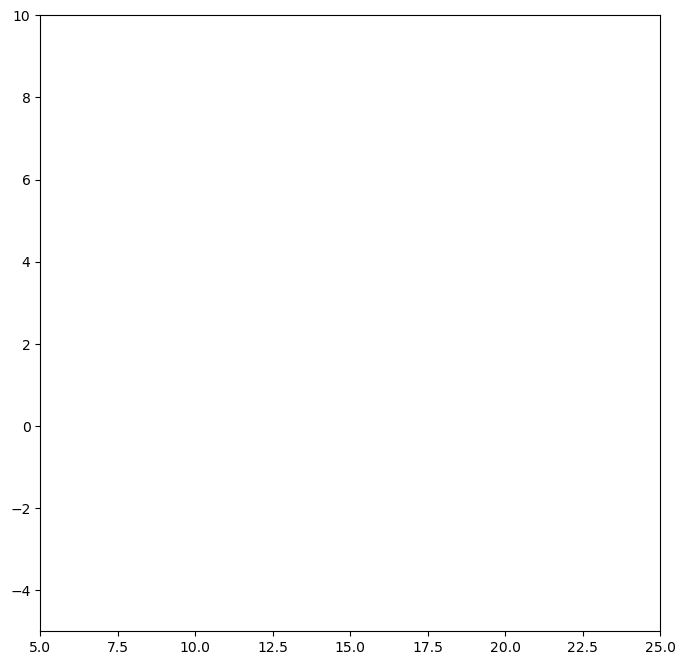

In [30]:
#plot doc2vec via TSNE
plot_doc2vec(d2v_data, titles,10)

In [43]:
#second plot
def plot_doc2vec(doc2vec_df, titles,_perplexity=10):
    #visualize documents through applying TSNE to doc2vec matrix
    tsne_model = TSNE(perplexity=_perplexity, n_components=2, init='pca', n_iter=2500, random_state=23)
    doc2vec_df = tsne_model.fit_transform(doc2vec_df)
    x = []
    y = []
    for value in doc2vec_df:
        x.append(value[0])
        y.append(value[1])

    plt.figure(figsize=(8, 8)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i], color=side[i], marker='o', edgecolor='gray', s=150)
    plt.xlim(0,8)
    plt.ylim(-2,6)
    plt.show()

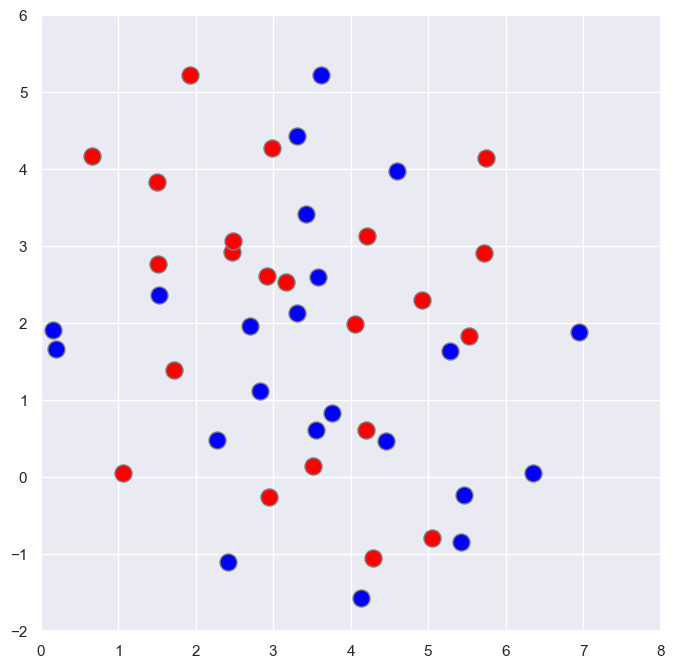

In [44]:
#plot doc2vec via TSNE
plot_doc2vec(d2v_data, titles,10)

In [45]:
#third plot

category_list = ["Social Issues", "Environment", "Economy", "Healthcare", "National Security", "Education"]

# Iterate over the category list and update values
for i in range(len(category)):
    if category[i]  == category_list[0]:
        category[i] = "pink"
    elif category[i]  == category_list[1]:
        category[i] = "green"
    elif category[i]  == category_list[2]:
        category[i] = "dodgerblue"
    elif category[i]  == category_list[3]:
        category[i] = "yellow"
    elif category[i]  == category_list[4]:
        category[i] = "blue"
    elif category[i]  == category_list[5]:
        category[i] = "red"

In [46]:
def plot_doc2vec(doc2vec_df, titles,_perplexity=10):
    #visualize documents through applying TSNE to doc2vec matrix
    tsne_model = TSNE(perplexity=_perplexity, n_components=2, init='pca', n_iter=2500, random_state=23)
    doc2vec_df = tsne_model.fit_transform(doc2vec_df)
    x = []
    y = []
    for value in doc2vec_df:
        x.append(value[0])
        y.append(value[1])

    plt.figure(figsize=(10, 10)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i], color=category[i], marker='o', edgecolor='gray', s=150)
        plt.annotate(final_data["Side"][i], #change side to "Category" if you want those labels
                     xy=(x[i], y[i]),
                     xytext=(1, 5),
                     textcoords='offset points',
                     ha='center',
                     va='bottom', fontsize=6)
    plt.xlim(0,8)
    plt.ylim(-2,6)
    plt.legend(category_list)
    plt.show()

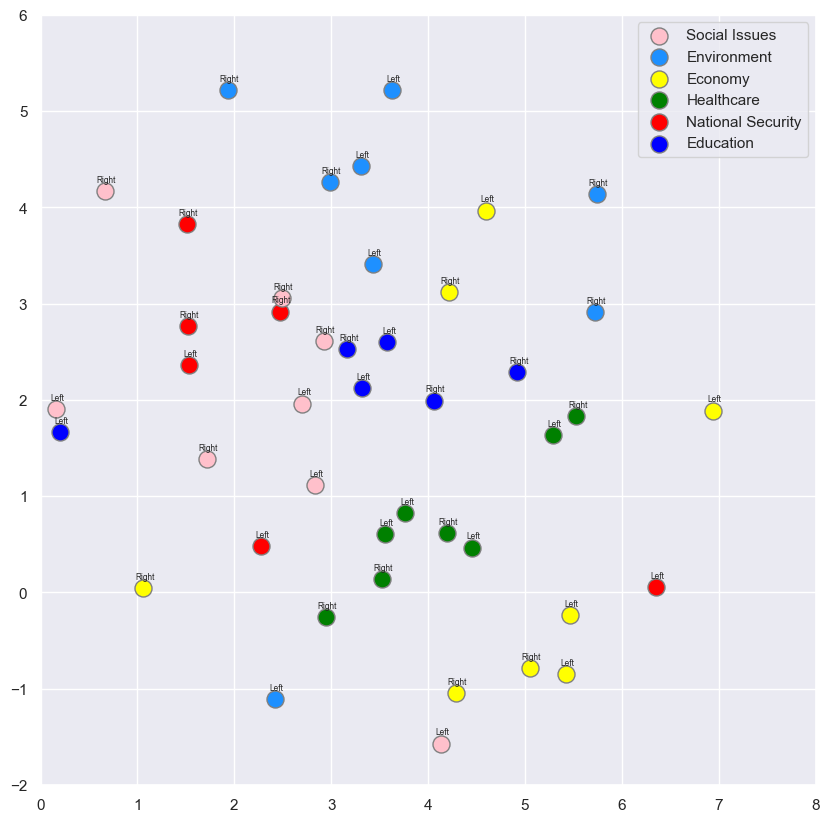

In [47]:
# Grouping legend entries by value
#plot doc2vec via TSNE
plot_doc2vec(d2v_data, titles,10)

In [48]:
###############################################################################
### Calculates the Cosine Similarity across your corpus using TFIDF matrix
###############################################################################
doc_term_matrix = tfidf_matrix.todense()
df = pd.DataFrame(doc_term_matrix, 
                      columns=vectorizer.get_feature_names_out(), 
                      index=docids)
   
similarity  = cosine_similarity(df, df)

In [49]:
similarity.shape

(44, 44)

Some more EDA: Did not turn out very readible but can be included if necesar

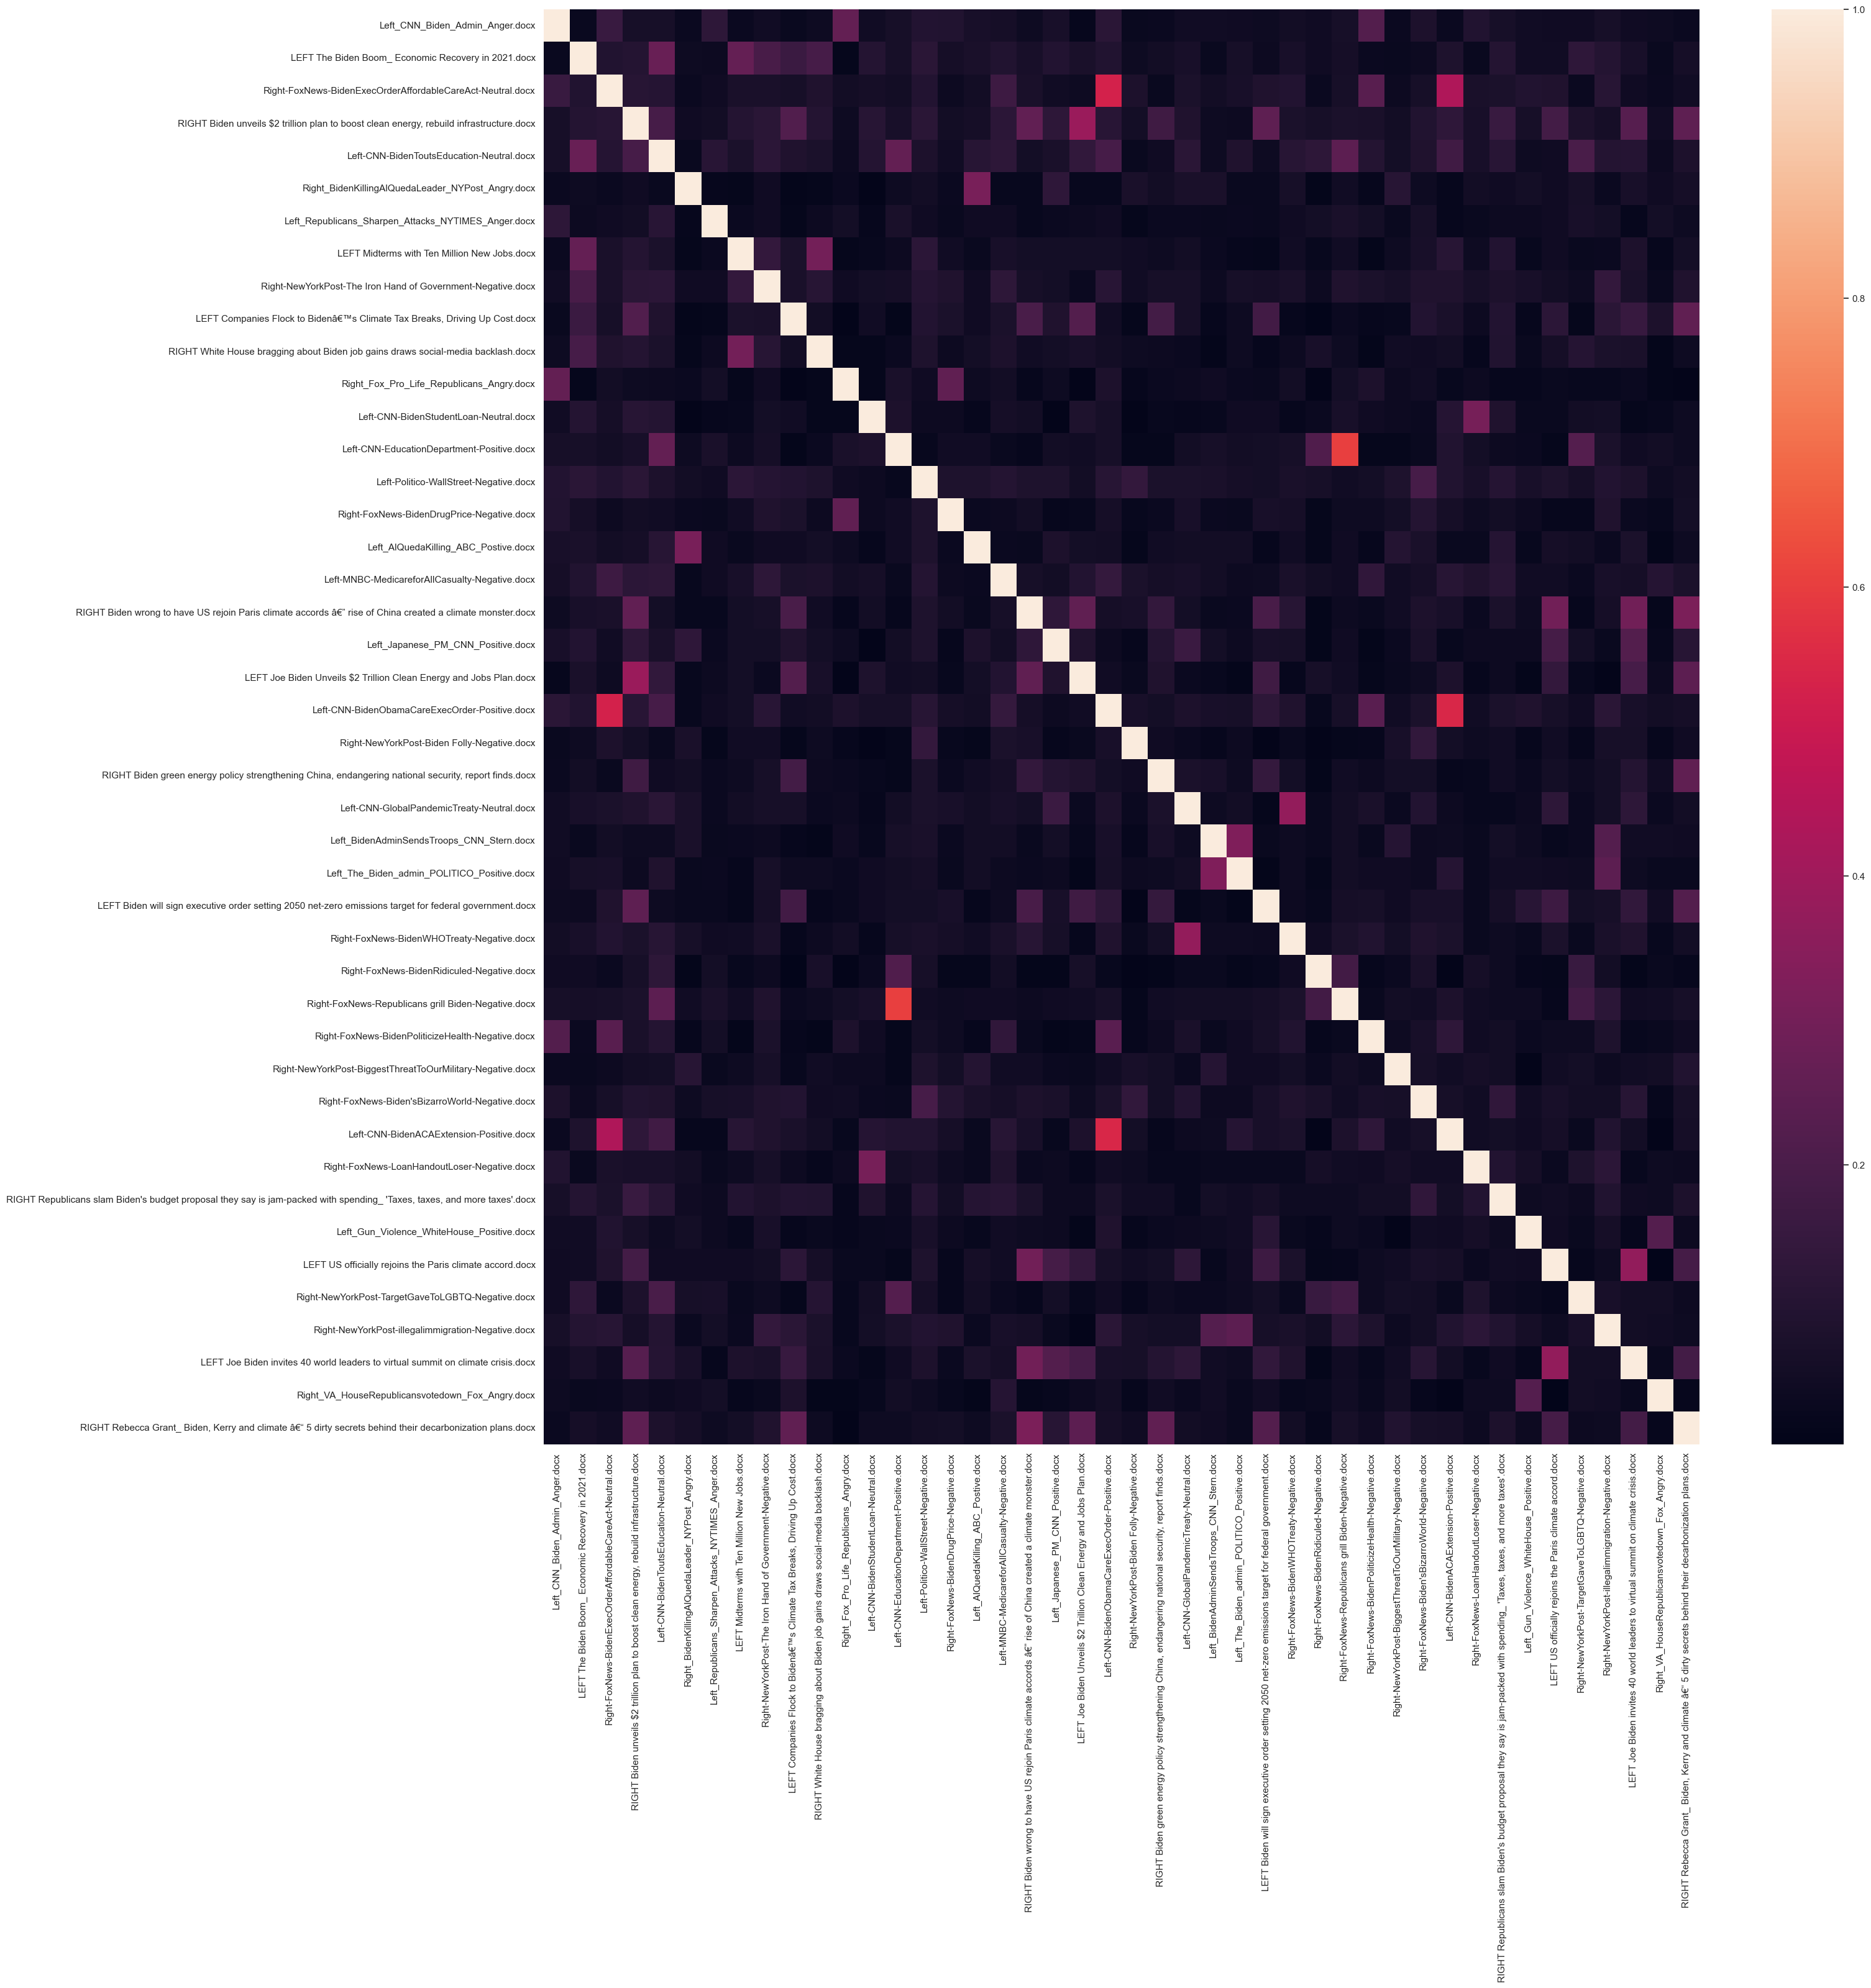

In [50]:
#heatmap of cosine similarity of documents
similarity  = cosine_similarity(df, df)

import seaborn as sns

from matplotlib import pyplot
import seaborn
from pylab import savefig


a4_dims = (30, 30)

fig, ax = pyplot.subplots(figsize=a4_dims)

svm = seaborn.heatmap(ax=ax, data=similarity, xticklabels= titles, yticklabels=titles)
figure = svm.get_figure
plt.savefig('heatmap.png', dpi=400)


## Topic Clustering

groupoing by relatability of topic. K - means clutering ties to groupclusters bynearest mean. Clusters built by similar features. 

In [69]:
###############################################################################
### K Means Clustering Doc2Vec
###############################################################################
doc2vec_k_means=d2v_data

k=11
km = KMeans(n_clusters=k, random_state =89)
km.fit(doc2vec_k_means)
clusters_d2v = km.labels_.tolist()

Dictionary={'Doc Name':titles, 'Cluster':clusters_d2v,  'Text': final_processed_text}
frame=pd.DataFrame(Dictionary, columns=['Cluster', 'Doc Name','Text'])

#dictionary to store clusters and respective titles
cluster_title={}

#note doc2vec clusters will not have individual words due to the vector representation
#is based on the entire document not indvidual words. As a result, there won't be individual
#word outputs from each cluster.   
for i in range(k):
    temp=frame[frame['Cluster']==i]
    temp_title_list=[]
    for title in temp['Doc Name']:
        temp_title_list.append(title)
    cluster_title[i]=temp_title_list

C:\Users\kraem\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\kraem\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [70]:
final_processed_text

['department health human services propose rule protect privacy seeking abortions prohibit prosecution proposal response recent texas federal ruling suspend food drug administrations approval mifepristone medication used abortions rule proposal would strengthen privacy protections prohibit disclosure protected health information regulated entities health insurance plans providers others criminal civil administrative investigations proceedings related reproductive healthcare senior administration official called existing guidance issued wake theâ supreme courts ruling last summerâ overturned wade ended right abortion nationwide current guidance still effect protects hipaa privacy rights requiring disclosure patient information certain circumstances officials said found providers would still following guidance subpoenaed proposed rule said providers cover provide information specific purpose articulated department education also issuing guidance remind school officials obligations studen

Clustering by doc2vec: DSI_Title + Category on X, cluster title on Y, DSI_Title + Team Assessment on Z

In [71]:
newline = '\n'
x = list()
y = list()

for i in range(0,len(cluster_title)):
    print(f'Cluster {i}: {newline}Title: ')
    for j in range(0,len(cluster_title[i])):
        x = final_data.loc[final_data['DSI_Title'] == cluster_title[i][j], 'Category'].item()
        #y = cluster_title[i][j]
        z = final_data.loc[final_data['DSI_Title'] == cluster_title[i][j], 'Team Assessment'].item()
        a = final_data.loc[final_data['DSI_Title'] == cluster_title[i][j], 'DSI_Title'].item()
        print(f' Category: {x}, Title: {a}, Sentiment: {z}')

Cluster 0: 
Title: 
 Category: Social Issues, Title: Left_CNN_Biden_Admin_Anger.docx, Sentiment: Negative
 Category: Social Issues, Title: Left_Republicans_Sharpen_Attacks_NYTIMES_Anger.docx, Sentiment: Negative
 Category: Social Issues, Title: Right_Fox_Pro_Life_Republicans_Angry.docx, Sentiment: Negative
 Category: Healthcare, Title: Right-FoxNews-BidenDrugPrice-Negative.docx, Sentiment: Negative
 Category: Healthcare, Title: Right-FoxNews-BidenPoliticizeHealth-Negative.docx, Sentiment: Negative
Cluster 1: 
Title: 
 Category: Economy, Title: RIGHT White House bragging about Biden job gains draws social-media backlash.docx, Sentiment: Negative
 Category: Education, Title: Right-FoxNews-BidenRidiculed-Negative.docx, Sentiment: Negative
 Category: Social Issues, Title: Right-NewYorkPost-TargetGaveToLGBTQ-Negative.docx, Sentiment: Negative
Cluster 2: 
Title: 
 Category: National Security, Title: Right_BidenKillingAlQuedaLeader_NYPost_Angry.docx, Sentiment: Negative
 Category: Economy, Ti

## Models Using BoW

### Logistic Regression

Text Classificiation using BoW. BoW is simple and effective way to represent text. Based on word count statistis. BoW is number of word appear in document. Records how many times each word apears in the text 

In [207]:
X = bow_data
y = final_data["Team Assessment"]
y = y.apply(lambda x: 1 if x == 'Positive' else 0)

#split data into train/test
#split dataset into a training and testing data set(s)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

bow_regressor = LogisticRegression()
bow_regressor.fit(X_train, y_train)


LogisticRegression()

In [208]:
y_pred = bow_regressor.predict(X_test)

[[10  0]
 [ 3  1]]


<Axes: >

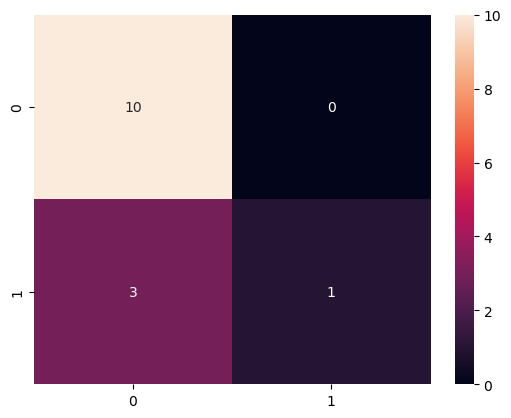

In [209]:
print(confusion_matrix(y_test, bow_regressor.predict(X_test)))
sns.heatmap(confusion_matrix(y_test, bow_regressor.predict(X_test)), annot=True)


In [210]:
print("The intercept for model is {}".format(bow_regressor.intercept_))

The intercept for model is [7.25093499e-07]


In [211]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R_square:', r2_score(y_test, y_pred))


Mean Absolute Error: 0.21428571428571427
Mean Squared Error: 0.21428571428571427
Root Mean Squared Error: 0.4629100498862757
R_square: -0.050000000000000044


              precision    recall  f1-score   support

           0       0.77      1.00      0.87        10
           1       1.00      0.25      0.40         4

    accuracy                           0.79        14
   macro avg       0.88      0.62      0.63        14
weighted avg       0.84      0.79      0.74        14



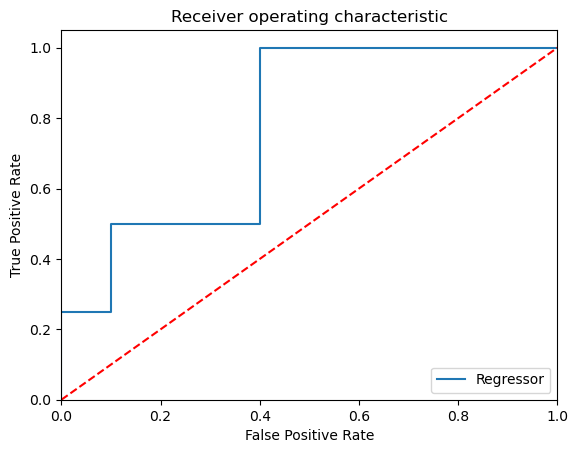

AUC: 0.775


In [212]:
#ROC
print(classification_report(y_test, y_pred))

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
DT_roc_auc = roc_auc_score(y_test, bow_regressor.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, bow_regressor.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Regressor' % DT_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Regressor_ROC')
plt.show()

# calculate AUC

print('AUC: %.3f' % metrics.auc(fpr, tpr))


### Naive Bayes Model

Naive Bayes is used for NLP applications with small datasets if the assumptions of independence holds true.  This assumption assumes that all predictors are independent.  In other words, the model assumes that the presence of one particular feature doesn't affect the presence of another.  Essentially, each features makes an independent and equal contribution to the model's outcome.

In [213]:
#Naive Bayes Model using BoW

X = bow_data
y = final_data["Team Assessment"]
y = y.apply(lambda x: 1 if x == 'Positive' else 0)

#split data into train/test
#split dataset into a training and testing data set(s)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [214]:
print(y.shape)
print(X.shape)

(44,)
(44, 449)


In [215]:
bow_NB_model = MultinomialNB()
bow_NB_model.fit(X_train, y_train)

MultinomialNB()

In [216]:
predicted = bow_NB_model.predict(X_test)
accuracy_bow_NB = metrics.accuracy_score(predicted, y_test)
print(str('{:04.2f}'.format(accuracy_bow_NB*100))+'%')

85.71%


In [217]:
#classification report
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90        10
           1       0.75      0.75      0.75         4

    accuracy                           0.86        14
   macro avg       0.82      0.82      0.82        14
weighted avg       0.86      0.86      0.86        14



              precision    recall  f1-score   support

           0       0.90      0.90      0.90        10
           1       0.75      0.75      0.75         4

    accuracy                           0.86        14
   macro avg       0.82      0.82      0.82        14
weighted avg       0.86      0.86      0.86        14



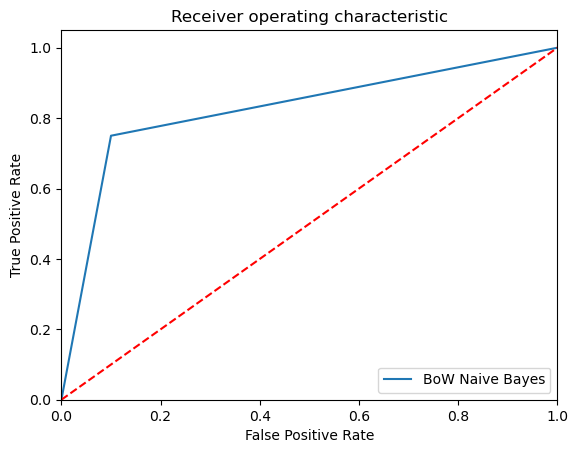

AUC: 0.825


In [218]:
#ROC
print(classification_report(y_test, predicted))

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
DT_roc_auc = roc_auc_score(y_test, bow_NB_model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, bow_NB_model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='BoW Naive Bayes' % DT_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('BoW-NB_ROC')
plt.show()

# calculate AUC

print('AUC: %.3f' % metrics.auc(fpr, tpr))

## SVM

SVMs handle high-dimensional spaces and non-linear boundaries, this makes them useful for NLP as the features (number of words) are large.  These tend to be better (more accurate) than Naive Bayes of Decision Trees but can be slow using large datasets.

In [219]:
#bag of words
X = bow_data
y = final_data["Team Assessment"]
y = y.apply(lambda x: 1 if x == 'Positive' else 0)


#split data into train/test
#split dataset into a training and testing data set(s)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [220]:
from sklearn.svm import SVC
# create a SVM classifier
bow_svm_classifier = SVC(kernel='linear', probability=True)
bow_svm_classifier

SVC(kernel='linear', probability=True)

In [221]:
# train the classifier on the training data
bow_svm_classifier.fit(X_train, y_train)

SVC(kernel='linear', probability=True)

In [222]:
# predict the test data using the trained classifier
y_pred = bow_svm_classifier.predict(X_test)

In [223]:
# calculate the accuracy score of the classifier
predicted = bow_svm_classifier.predict(X_test)
accuracy_bow_svm_classifier = metrics.accuracy_score(predicted, y_test)
print(str('{:04.2f}'.format(accuracy_bow_svm_classifier*100))+'%')

85.71%


In [224]:
#classification report
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91        10
           1       1.00      0.50      0.67         4

    accuracy                           0.86        14
   macro avg       0.92      0.75      0.79        14
weighted avg       0.88      0.86      0.84        14



              precision    recall  f1-score   support

           0       0.83      1.00      0.91        10
           1       1.00      0.50      0.67         4

    accuracy                           0.86        14
   macro avg       0.92      0.75      0.79        14
weighted avg       0.88      0.86      0.84        14



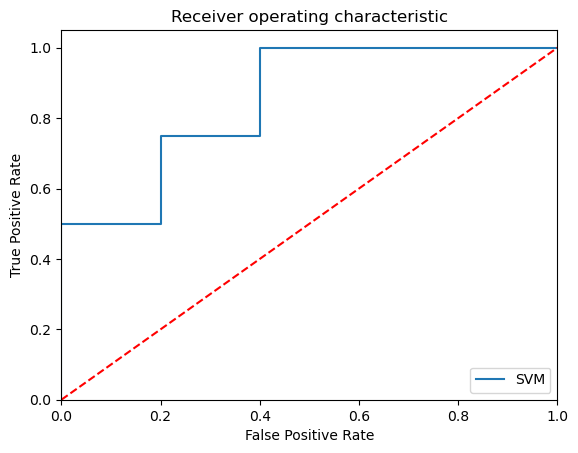

AUC: 0.850


In [225]:
#ROC
print(classification_report(y_test, predicted))

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
DT_roc_auc = roc_auc_score(y_test, bow_svm_classifier.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, bow_svm_classifier.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='SVM' % DT_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('SVM_ROC')
plt.show()

# calculate AUC

print('AUC: %.3f' % metrics.auc(fpr, tpr))

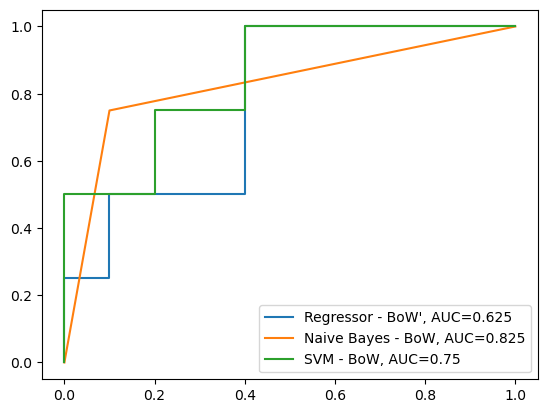

In [226]:
#set up plotting area
plt.figure(0).clf()

#BoW Logistic Regression
DT_roc_auc = roc_auc_score(y_test, bow_regressor.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, bow_regressor.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, label="Regressor - BoW', AUC="+str(DT_roc_auc))

#BoW Naive Bayes
DT_roc_auc = roc_auc_score(y_test, bow_NB_model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, bow_NB_model.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, label="Naive Bayes - BoW, AUC="+str(DT_roc_auc))

#BoW SVM
DT_roc_auc = roc_auc_score(y_test, bow_svm_classifier.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, bow_svm_classifier.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, label="SVM - BoW, AUC="+str(DT_roc_auc))

#add legend
plt.legend()

## Models Using TF-IDF

### Naive Bayes Model

In [227]:
#Naive Bayes Model using TF-IDF
X = tfidf_data
y = final_data["Team Assessment"]
y = y.apply(lambda x: 1 if x == 'Positive' else 0)

#split data into train/test
#split dataset into a training and testing data set(s)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

In [228]:
tfidf_NB_model = MultinomialNB()
tfidf_NB_model.fit(X_train, y_train)

MultinomialNB()

In [229]:
predicted = tfidf_NB_model.predict(X_test)
accuracy_tfidf_NB = metrics.accuracy_score(predicted, y_test)
print(str('{:04.2f}'.format(accuracy_tfidf_NB*100))+'%')

60.00%


In [230]:
#classification report
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.60      1.00      0.75         3
           1       0.00      0.00      0.00         2

    accuracy                           0.60         5
   macro avg       0.30      0.50      0.37         5
weighted avg       0.36      0.60      0.45         5



C:\Users\kraem\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kraem\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kraem\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


C:\Users\kraem\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kraem\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kraem\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.60      1.00      0.75         3
           1       0.00      0.00      0.00         2

    accuracy                           0.60         5
   macro avg       0.30      0.50      0.37         5
weighted avg       0.36      0.60      0.45         5



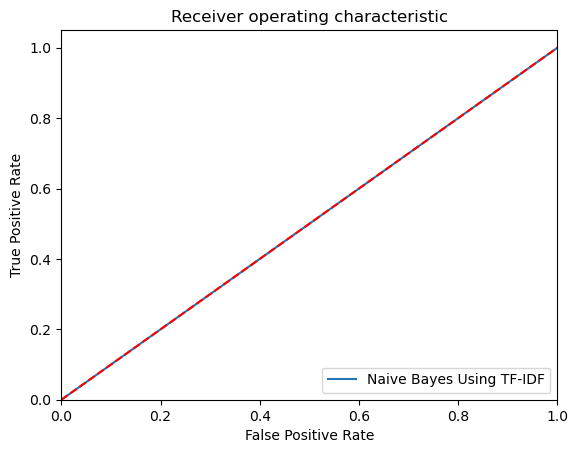

AUC: 0.500


In [231]:
#ROC
print(classification_report(y_test, predicted))

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
DT_roc_auc = roc_auc_score(y_test, tfidf_NB_model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, tfidf_NB_model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Naive Bayes Using TF-IDF' % DT_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('NB_TFIDF_ROC')
plt.show()

# calculate AUC

print('AUC: %.3f' % metrics.auc(fpr, tpr))

## SVM using TF-IDF

In [232]:
#TF IDF
X = tfidf_data
y = final_data["Team Assessment"]
y = y.apply(lambda x: 1 if x == 'Positive' else 0)


#split data into train/test
#split dataset into a training and testing data set(s)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [233]:
from sklearn.svm import SVC
# create a SVM classifier
tfidf_svm_classifier = SVC(kernel='linear', probability=True)
tfidf_svm_classifier

SVC(kernel='linear', probability=True)

In [234]:
# train the classifier on the training data
tfidf_svm_classifier.fit(X_train, y_train)

SVC(kernel='linear', probability=True)

In [235]:
# predict the test data using the trained classifier
y_pred = tfidf_svm_classifier.predict(X_test)

In [236]:
# calculate the accuracy score of the classifier
predicted = tfidf_svm_classifier.predict(X_test)
accuracy_tfidf_svm_classifier = metrics.accuracy_score(predicted, y_test)
print(str('{:04.2f}'.format(accuracy_tfidf_svm_classifier*100))+'%')

71.43%


In [237]:
#classification report
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.71      1.00      0.83        10
           1       0.00      0.00      0.00         4

    accuracy                           0.71        14
   macro avg       0.36      0.50      0.42        14
weighted avg       0.51      0.71      0.60        14



C:\Users\kraem\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kraem\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kraem\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


C:\Users\kraem\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kraem\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kraem\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.71      1.00      0.83        10
           1       0.00      0.00      0.00         4

    accuracy                           0.71        14
   macro avg       0.36      0.50      0.42        14
weighted avg       0.51      0.71      0.60        14



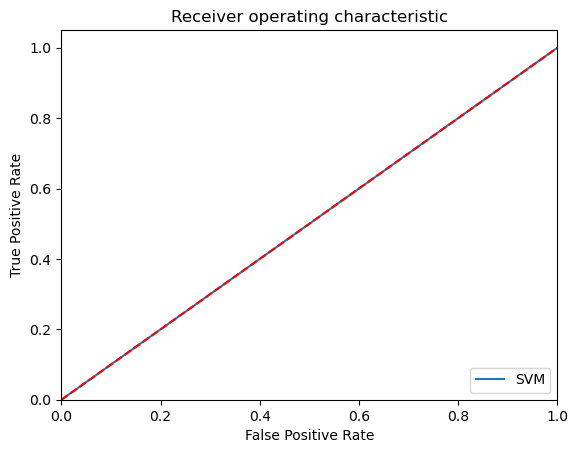

AUC: 0.500


In [238]:
#ROC
print(classification_report(y_test, predicted))

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
DT_roc_auc = roc_auc_score(y_test, tfidf_svm_classifier.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, tfidf_svm_classifier.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='SVM' % DT_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('SVM_ROC')
plt.show()

# calculate AUC

print('AUC: %.3f' % metrics.auc(fpr, tpr))

## Logistic Regression using TF-IDF

In [239]:
X = tfidf_data
y = final_data["Team Assessment"]
y = y.apply(lambda x: 1 if x == 'Positive' else 0)

#split data into train/test
#split dataset into a training and testing data set(s)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

tfidf_regressor = LogisticRegression()
tfidf_regressor.fit(X_train, y_train)

LogisticRegression()

In [240]:
y_pred = tfidf_regressor.predict(X_test)

In [241]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R_square:', r2_score(y_test, y_pred))

Mean Absolute Error: 0.2857142857142857
Mean Squared Error: 0.2857142857142857
Root Mean Squared Error: 0.5345224838248488
R_square: -0.3999999999999999


C:\Users\kraem\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kraem\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kraem\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.71      1.00      0.83        10
           1       0.00      0.00      0.00         4

    accuracy                           0.71        14
   macro avg       0.36      0.50      0.42        14
weighted avg       0.51      0.71      0.60        14



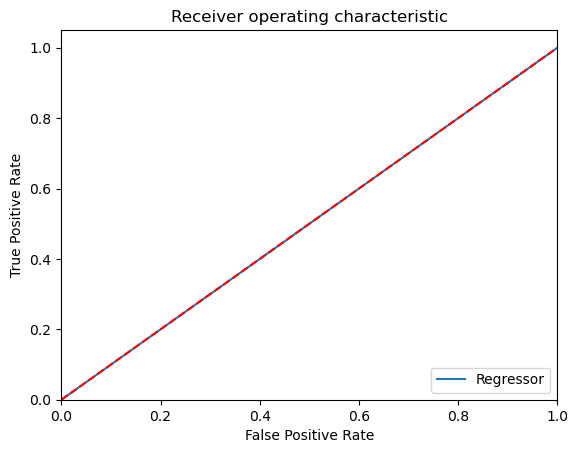

AUC: 0.500


In [242]:
#ROC
print(classification_report(y_test, y_pred))

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
DT_roc_auc = roc_auc_score(y_test, tfidf_regressor.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, tfidf_regressor.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Regressor' % DT_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Regressor_ROC')
plt.show()

# calculate AUC

print('AUC: %.3f' % metrics.auc(fpr, tpr))

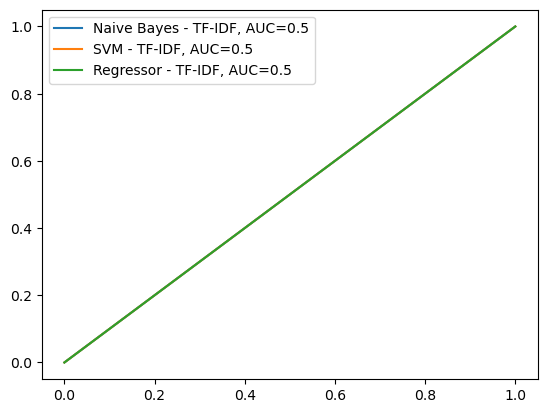

In [243]:
#set up plotting area
plt.figure(0).clf()

#Naive Bayes TF-IDF
DT_roc_auc = roc_auc_score(y_test, tfidf_NB_model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, tfidf_NB_model.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, label="Naive Bayes - TF-IDF, AUC="+str(DT_roc_auc))

#SVM TF-IDF
DT_roc_auc = roc_auc_score(y_test, tfidf_svm_classifier.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, tfidf_svm_classifier.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, label="SVM - TF-IDF, AUC="+str(DT_roc_auc))

#Logistic Regresssion TF-IDF
DT_roc_auc = roc_auc_score(y_test, tfidf_regressor.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, tfidf_regressor.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, label="Regressor - TF-IDF, AUC="+str(DT_roc_auc))

#add legend
plt.legend()

## Models using Word2Vec

In [42]:
#Naive Bayes Model using TF-IDF
#probably won't be using this for our project per Dr. Maren's direction

## Model Using Doc2Vec

## Naive Bayes Model

In [245]:
#Naive Bayes Model using Doc2Vec
X = d2v_data
y = final_data["Team Assessment"]
y = y.apply(lambda x: 1 if x == 'Positive' else 0)

#split data into train/test
#split dataset into a training and testing data set(s)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

In [246]:
# Train the Naive Bayes classifier
d2v_classifier = GaussianNB()
d2v_classifier.fit(X_train, y_train)

GaussianNB()

In [247]:
# Evaluate the classifier
accuracy = d2v_classifier.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.8


In [248]:
predicted = d2v_classifier.predict(X_test)
accuracy_tfidf_NB = metrics.accuracy_score(predicted, y_test)
print(str('{:04.2f}'.format(accuracy_tfidf_NB*100))+'%')

80.00%


In [249]:
#classification report
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       1.00      0.50      0.67         2

    accuracy                           0.80         5
   macro avg       0.88      0.75      0.76         5
weighted avg       0.85      0.80      0.78         5



              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       1.00      0.50      0.67         2

    accuracy                           0.80         5
   macro avg       0.88      0.75      0.76         5
weighted avg       0.85      0.80      0.78         5



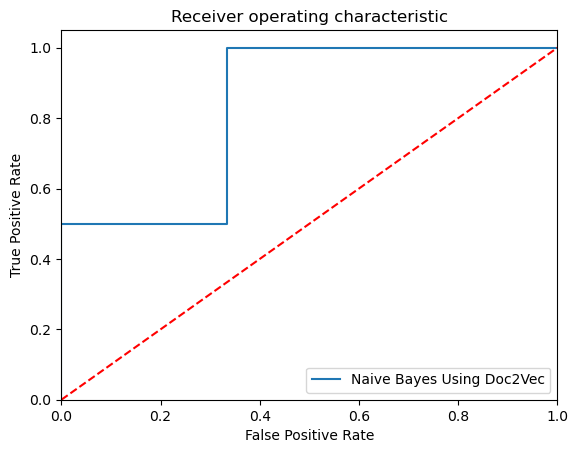

AUC: 0.833


In [250]:
#ROC
print(classification_report(y_test, predicted))

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
DT_roc_auc = roc_auc_score(y_test, d2v_classifier.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, d2v_classifier.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Naive Bayes Using Doc2Vec' % DT_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('NB_TFIDF_ROC')
plt.show()

# calculate AUC

print('AUC: %.3f' % metrics.auc(fpr, tpr))

## SVM Using Doc2Vec

In [102]:
#Doc2Vec
X = d2v_data
y = final_data["Team Assessment"]
y = y.apply(lambda x: 1 if x == 'Positive' else 0)


#split data into train/test
#split dataset into a training and testing data set(s)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [251]:
from sklearn.svm import SVC
# create a SVM classifier
d2v_svm_classifier = SVC(kernel='linear', probability=True)
d2v_svm_classifier

SVC(kernel='linear', probability=True)

In [252]:
# train the classifier on the training data
d2v_svm_classifier.fit(X_train, y_train)

SVC(kernel='linear', probability=True)

In [253]:
# predict the test data using the trained classifier
y_pred = d2v_svm_classifier.predict(X_test)

In [254]:
# calculate the accuracy score of the classifier
predicted = d2v_svm_classifier.predict(X_test)
accuracy_d2v_svm_classifier = metrics.accuracy_score(predicted, y_test)
print(str('{:04.2f}'.format(accuracy_d2v_svm_classifier*100))+'%')

60.00%


In [255]:
#classification report
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.67      0.67      0.67         3
           1       0.50      0.50      0.50         2

    accuracy                           0.60         5
   macro avg       0.58      0.58      0.58         5
weighted avg       0.60      0.60      0.60         5



              precision    recall  f1-score   support

           0       0.67      0.67      0.67         3
           1       0.50      0.50      0.50         2

    accuracy                           0.60         5
   macro avg       0.58      0.58      0.58         5
weighted avg       0.60      0.60      0.60         5



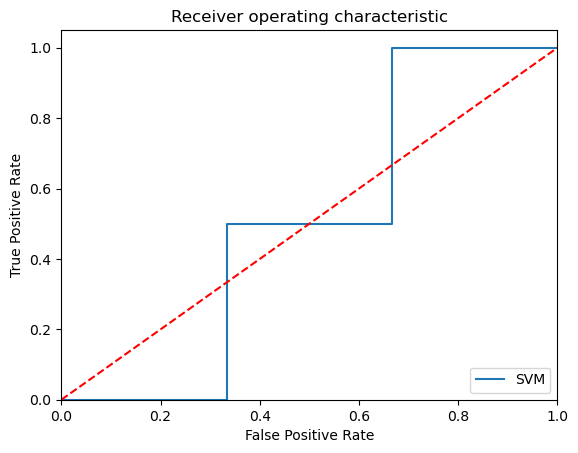

AUC: 0.500


In [256]:
#ROC
print(classification_report(y_test, predicted))

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
DT_roc_auc = roc_auc_score(y_test, d2v_svm_classifier.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, d2v_svm_classifier.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='SVM' % DT_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('SVM_ROC')
plt.show()

# calculate AUC

print('AUC: %.3f' % metrics.auc(fpr, tpr))

## Logistic Regression Using Doc2Vec

In [257]:
X = d2v_data
y = final_data["Team Assessment"]
y = y.apply(lambda x: 1 if x == 'Positive' else 0)

#split data into train/test
#split dataset into a training and testing data set(s)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

d2v_regressor = LogisticRegression()
d2v_regressor.fit(X_train, y_train)

LogisticRegression()

In [258]:
y_pred = d2v_regressor.predict(X_test)

In [259]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R_square:', r2_score(y_test, y_pred))

Mean Absolute Error: 0.5
Mean Squared Error: 0.5
Root Mean Squared Error: 0.7071067811865476
R_square: -1.4499999999999997


              precision    recall  f1-score   support

           0       0.71      0.50      0.59        10
           1       0.29      0.50      0.36         4

    accuracy                           0.50        14
   macro avg       0.50      0.50      0.48        14
weighted avg       0.59      0.50      0.52        14



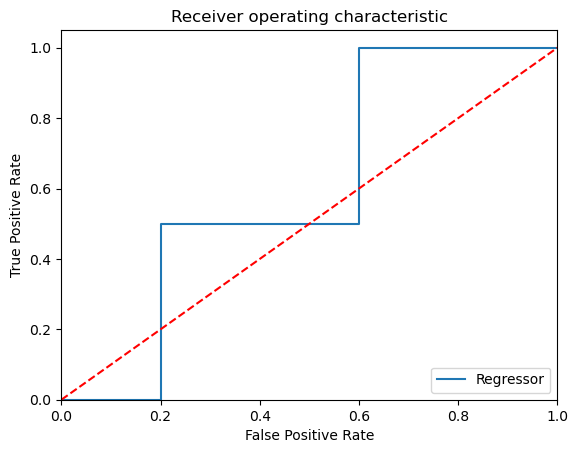

AUC: 0.600


In [260]:
#ROC
print(classification_report(y_test, y_pred))

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
DT_roc_auc = roc_auc_score(y_test, d2v_regressor.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, d2v_regressor.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Regressor' % DT_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Regressor_ROC')
plt.show()

# calculate AUC

print('AUC: %.3f' % metrics.auc(fpr, tpr))

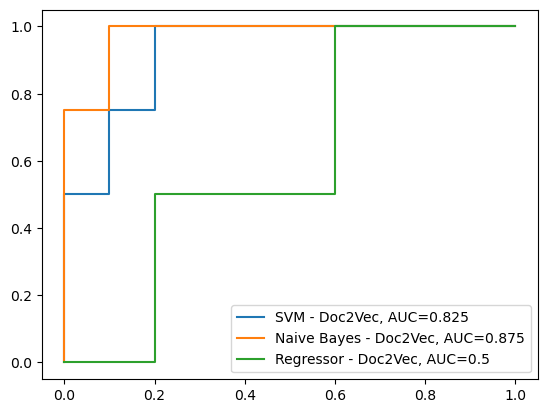

In [261]:
#set up plotting area
plt.figure(0).clf()

#SVM Doc2Vec
DT_roc_auc = roc_auc_score(y_test, d2v_svm_classifier.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, d2v_svm_classifier.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, label="SVM - Doc2Vec, AUC="+str(DT_roc_auc))

#Naive Bayes Doc2Vec
DT_roc_auc = roc_auc_score(y_test, d2v_classifier.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, d2v_classifier.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, label="Naive Bayes - Doc2Vec, AUC="+str(DT_roc_auc))

#Logistic Regression Doc2Vec
DT_roc_auc = roc_auc_score(y_test, d2v_regressor.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, d2v_regressor.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, label="Regressor - Doc2Vec, AUC="+str(DT_roc_auc))


#add legend
plt.legend()

## RNN Model (Bonus Models for Project)

We can expound upon RNNs if needed but this was just a bonus model to see if we could get something really accurate but it's not as good as Naive Bayes or SVM.  Note: this model was not optimized via grid_search to get the optimum hyperparameters.

In [96]:
#RNN Using BoW
import pydot

X = bow_data
y = final_data["Team Assessment"]
y = y.apply(lambda x: 1 if x == 'Positive' else 0)

#split data into train/test
#split dataset into a training and testing data set(s)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)



In [97]:
def preprocess_inputs(df):
    df = df.copy()
   
    
    # Use only the review and rating column
    y = final_data['Team Assessment']
    X = final_data['Processed_Text']
    
    
    # Make y a binary target
    y = y.apply(lambda x: 1 if x == 'Positive' else 0)
    
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)
    
    
    # Learn the vocabulary
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(X_train)
    
    
    # Find the size of the vocabulary
    vocab_length = len(tokenizer.word_index) + 1
    print("Vocab length:", vocab_length)
    
    
    # Convert review texts into sequences of integers
    X_train = tokenizer.texts_to_sequences(X_train)
    X_test = tokenizer.texts_to_sequences(X_test)
    
    
    # Find the maximum sequence length
    max_seq_length = np.max(list(map(lambda x: len(x), X_train)))
    print("Maximum sequence length:", max_seq_length)
    
    
    # Pad the sequences to by uniform length
    X_train = pad_sequences(X_train, maxlen=355, padding='post')
    X_test = pad_sequences(X_test, maxlen=355, padding='post')
    
    
    return X_train, X_test, y_train, y_test, vocab_length, max_seq_length

In [98]:
X_train, X_test, y_train, y_test, VOCAB_LENGTH, MAX_SEQ_LENGTH = preprocess_inputs(data)

Vocab length: 2248
Maximum sequence length: 449


In [99]:
inputs = tf.keras.Input(shape=(X_train.shape[1],))

word_embedding = tf.keras.layers.Embedding(
    input_dim=VOCAB_LENGTH,
    output_dim=128,
    input_length=MAX_SEQ_LENGTH
)(inputs)

word_flatten = tf.keras.layers.Flatten()(word_embedding)
gru = tf.keras.layers.GRU(256, return_sequences=False, activation='tanh')(word_embedding)

concat = tf.keras.layers.concatenate([word_flatten, gru])

outputs = tf.keras.layers.Dense(1, activation='sigmoid')(concat)


model = tf.keras.Model(inputs=inputs, outputs=outputs)

print(model.summary())

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 355)]        0           []                               
                                                                                                  
 embedding (Embedding)          (None, 355, 128)     287744      ['input_1[0][0]']                
                                                                                                  
 flatten (Flatten)              (None, 45440)        0           ['embedding[0][0]']              
                                                                                                  
 gru (GRU)                      (None, 256)          296448      ['embedding[0][0]']              
                                                                                              

In [100]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)


history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=32,
    epochs=100,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=3,
            restore_best_weights=True
        )
    ]
)

Epoch 1/100
1/1 [==============================] - 3s 3s/step - loss: 0.6930 - accuracy: 0.5000 - val_loss: 0.7183 - val_accuracy: 0.5000
Epoch 2/100
1/1 [==============================] - 1s 599ms/step - loss: 0.5634 - accuracy: 1.0000 - val_loss: 0.7357 - val_accuracy: 0.5000
Epoch 3/100
1/1 [==============================] - 1s 538ms/step - loss: 0.4585 - accuracy: 1.0000 - val_loss: 0.7588 - val_accuracy: 0.3333
Epoch 4/100
1/1 [==============================] - 1s 536ms/step - loss: 0.3725 - accuracy: 1.0000 - val_loss: 0.7858 - val_accuracy: 0.3333


In [101]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 94ms/step - loss: 0.6581 - accuracy: 0.7857


[0.658146858215332, 0.7857142686843872]

In [102]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 79ms/step - loss: 0.6581 - accuracy: 0.7857


[0.658146858215332, 0.7857142686843872]

In [125]:
predicted = model.predict(X_test)
lfunc = lambda x: 0 if x < 0.50 else 1
result = pd.Series(map(lfunc, predicted))
predicted = result

1/1 [==============================] - 0s 79ms/step


In [126]:
#type(y_test)
predicted

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
dtype: int64

In [127]:
#ROC
print(classification_report(y_test, predicted))

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
DT_roc_auc = roc_auc_score(y_test, model.predict(X_test,average='binary'))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='RNN' % DT_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('RNN_ROC')
plt.show()

# calculate AUC

print('AUC: %.3f' % metrics.auc(fpr, tpr))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88        11
           1       0.00      0.00      0.00         3

    accuracy                           0.79        14
   macro avg       0.39      0.50      0.44        14
weighted avg       0.62      0.79      0.69        14



C:\Users\kraem\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kraem\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kraem\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


TypeError: predict() got an unexpected keyword argument 'average'

## Multiple ROCs on Single Chart

In [206]:
#set up plotting area
plt.figure(0).clf()

#SVM Doc2Vec
DT_roc_auc = roc_auc_score(y_test, svm_classifier.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, svm_classifier.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, label="SVM - Doc2Vec, AUC="+str(DT_roc_auc))

#Naive Bayes Doc2Vec
DT_roc_auc = roc_auc_score(y_test, d2v_classifier.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, d2v_classifier.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, label="Naive Bayes - Doc2Vec, AUC="+str(DT_roc_auc))

#Logistic Regression Doc2Vec
DT_roc_auc = roc_auc_score(y_test, d2v_regressor.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, d2v_regressor.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, label="Regressor - Doc2Vec, AUC="+str(DT_roc_auc))


#add legend
plt.legend()

ValueError: X has 2911 features, but SVC is expecting 100 features as input.

<Figure size 640x480 with 0 Axes>

In [101]:
#TEST
#https://towardsdatascience.com/sentiment-analysis-using-lstm-and-glove-embeddings-99223a87fe8e